In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
pd.set_option('display.max_rows', None)

In [19]:
baseline = pd.read_csv('../main/log/feature_selection20241017.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])


In [20]:
baseline.tail()

algo                            experiment  noise dataset  seed  \
280275  GSGP  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0    ld50     9   
280276  GSGP  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0    ld50     9   
280277  GSGP  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0    ld50     9   
280278  GSGP  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0    ld50     9   
280279  GSGP  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0    ld50     9   

        generation  training_fitness    timing  pop_node_count  test_fitness  \
280275         996       1965.537598  0.094705         14214.0   2149.658691   
280276         997       1965.537598  0.095880         13637.0   2149.658691   
280277         998       1965.537598  0.094866         13349.0   2149.658691   
280278         999       1965.537598  0.093329         13119.0   2149.658691   
280279        1000       1965.537598  0.095996         13339.0   2149.658691   

        elite_size  log  
280275          94    1  
280276          94    1  
280277          94    1  
280278          94    1  
280279          94    1

In [21]:
baseline.shape

(280280, 12)

In [22]:
data = pd.read_csv('../main/log/feature_selection_20241018.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data2 = pd.read_csv('../main/log/feature_selection_20241028.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [23]:
data = pd.concat((data, data2))

In [24]:
data.reset_index(inplace = True, drop = True)

In [25]:
data.head()

algo                   experiment  noise dataset  seed  generation  \
0  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           0   
1  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           1   
2  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           2   
3  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           3   
4  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           4   

   training_fitness    timing  pop_node_count  test_fitness  elite_size  log  
0         14.395947  0.038155          1454.0     13.652810           7    1  
1         14.395947  0.037943          1826.0     13.652810           7    1  
2         14.123997  0.017601          1390.0     14.429284          19    1  
3         13.559673  0.031584          1896.0     13.723904          31    1  
4         13.559673  0.018252          1466.0     13.723904          31    1

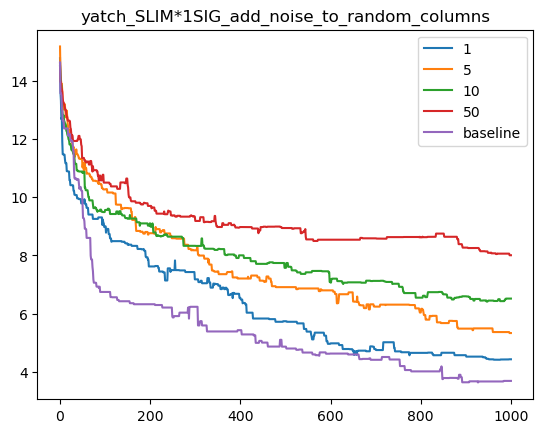

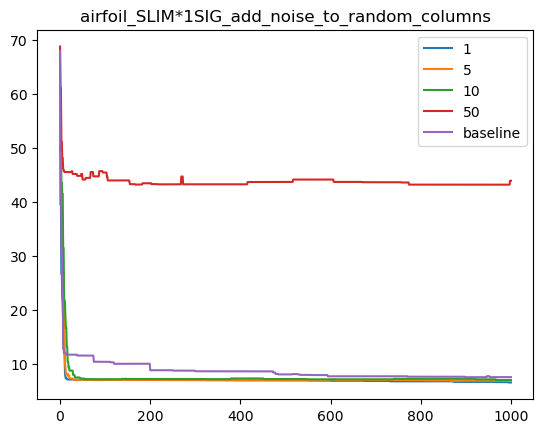

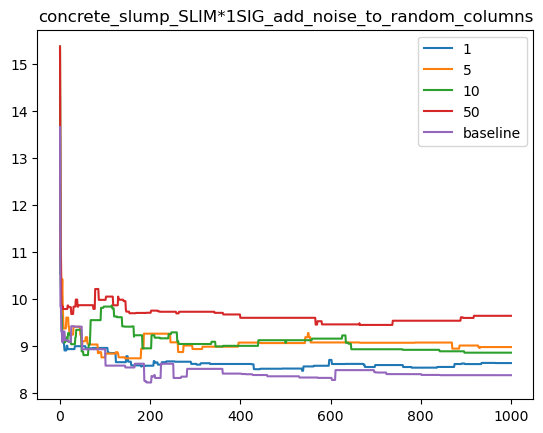

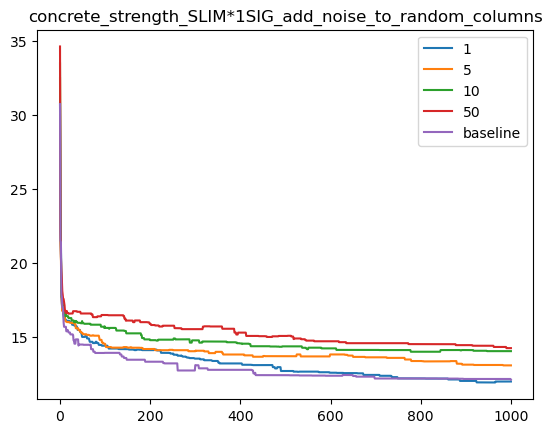

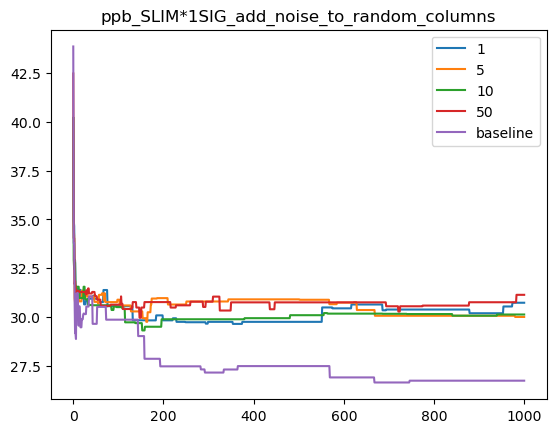

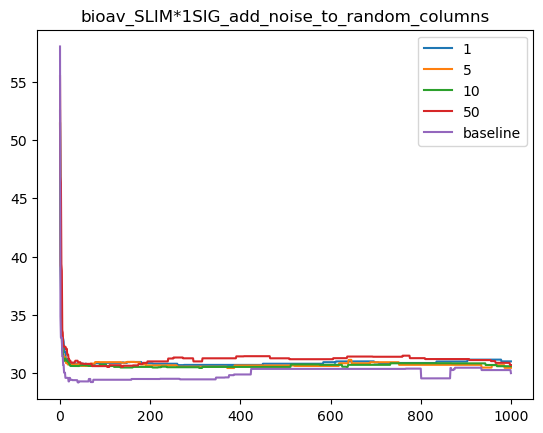

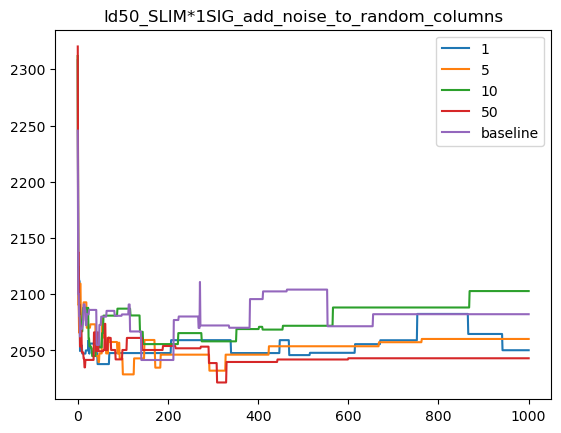

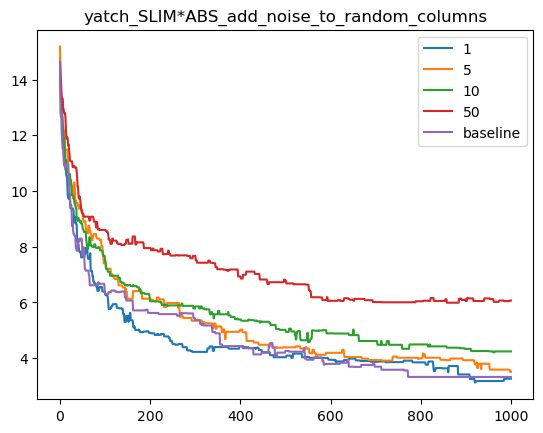

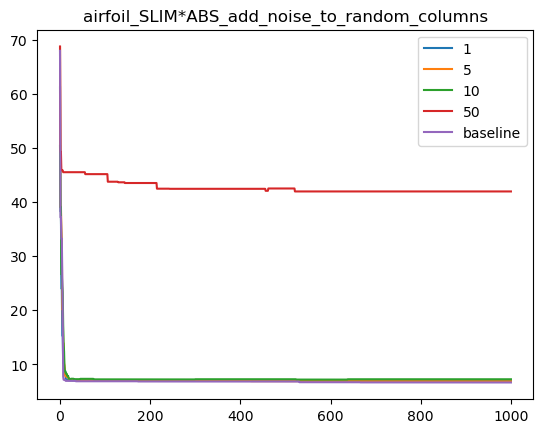

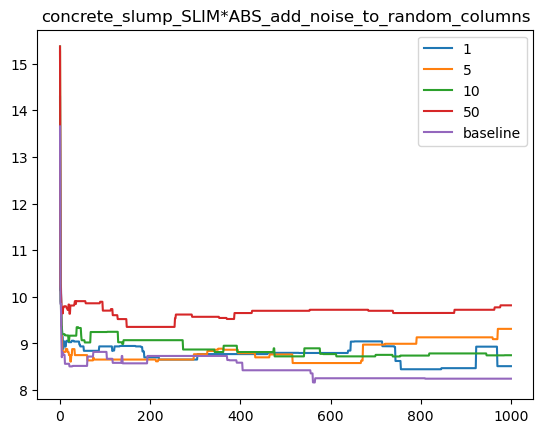

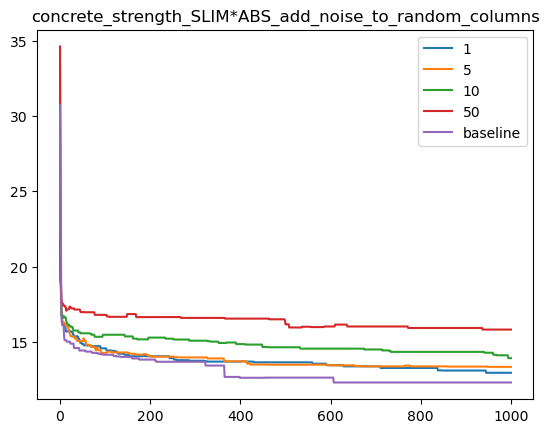

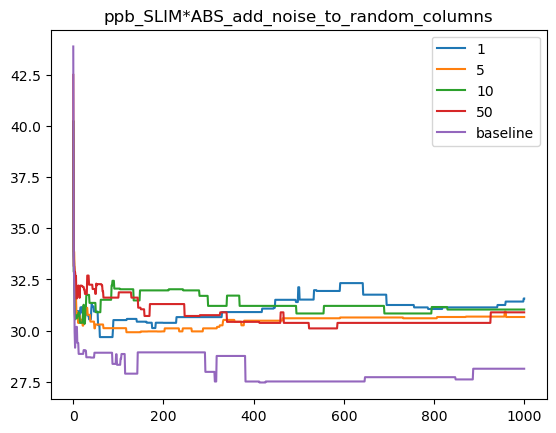

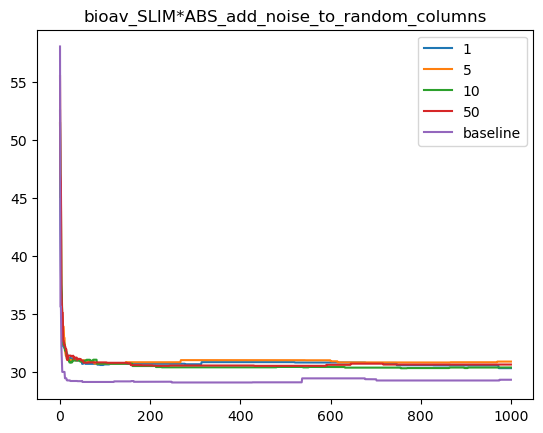

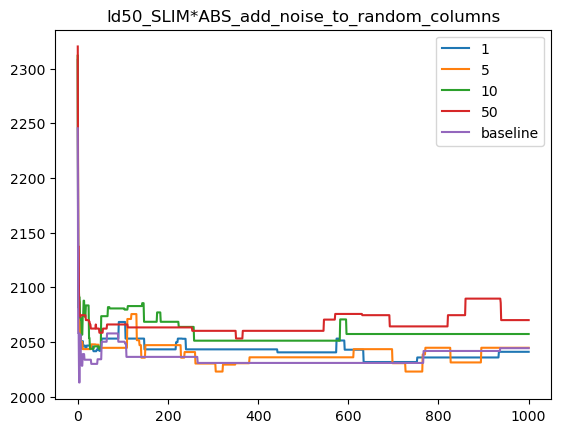

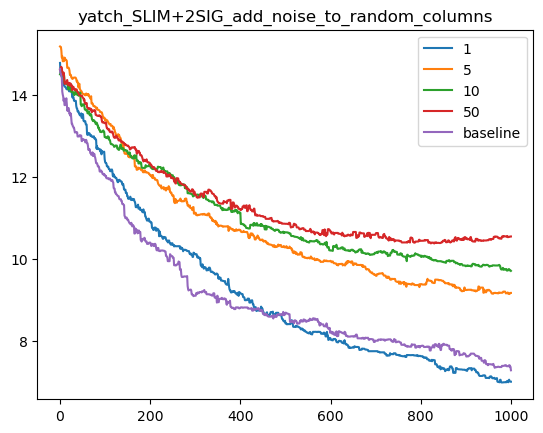

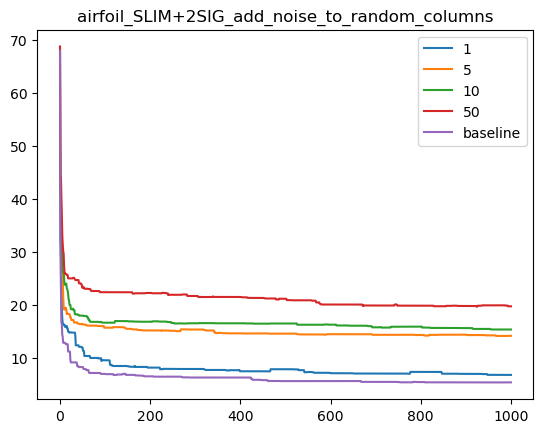

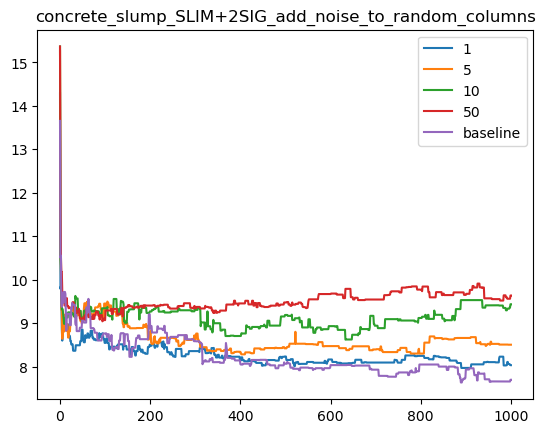

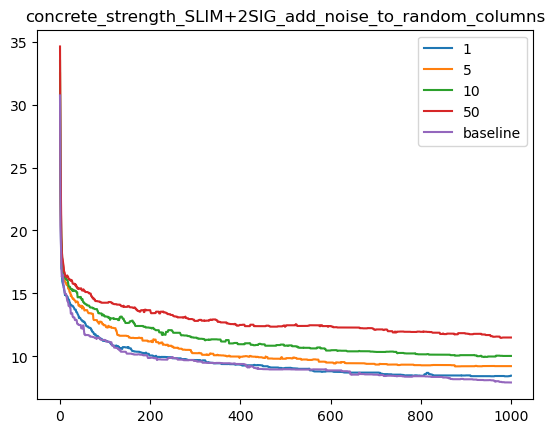

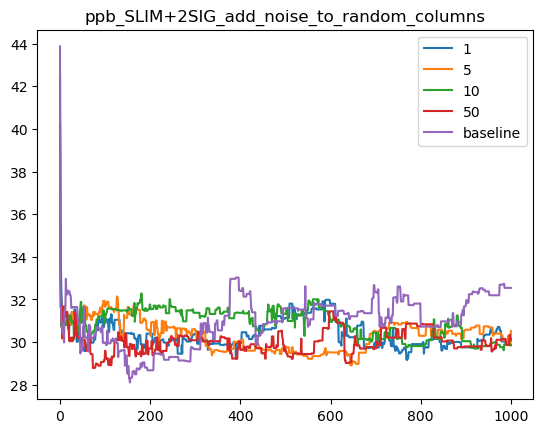

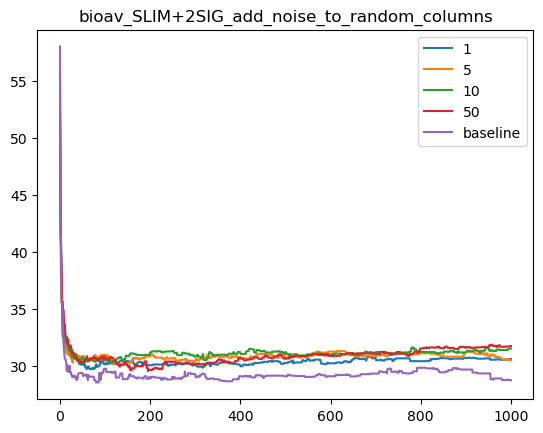

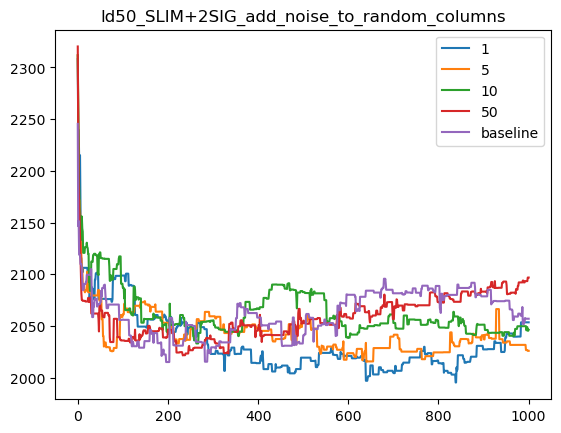

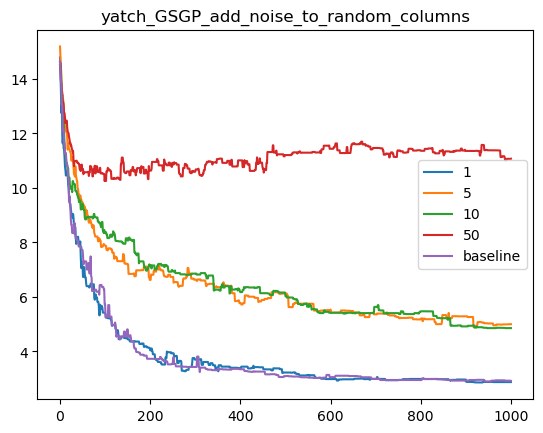

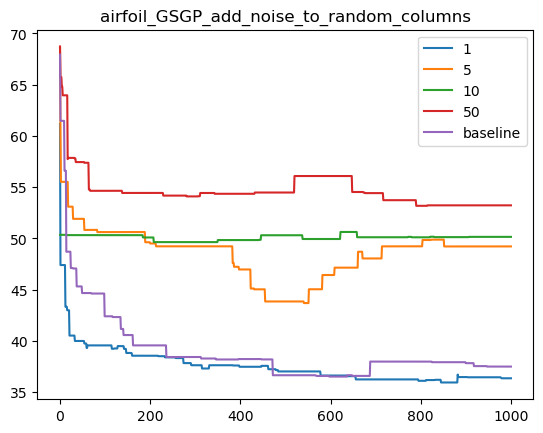

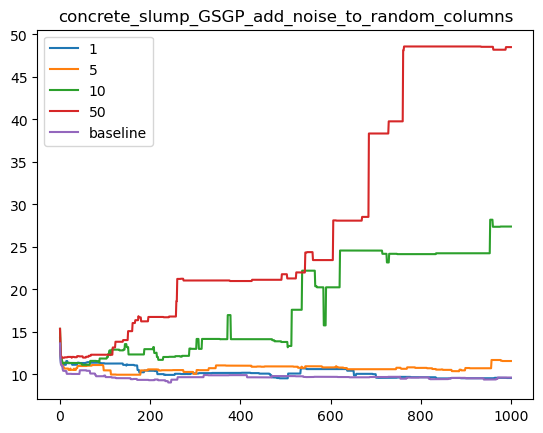

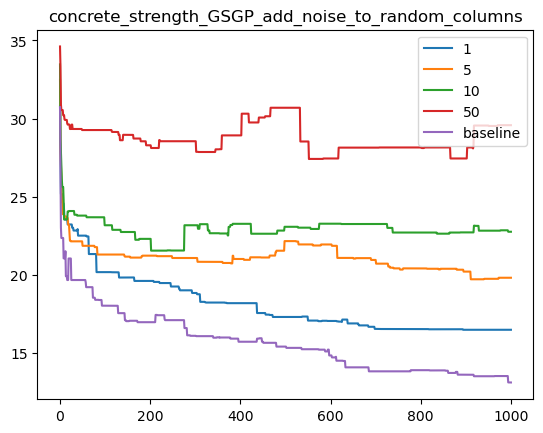

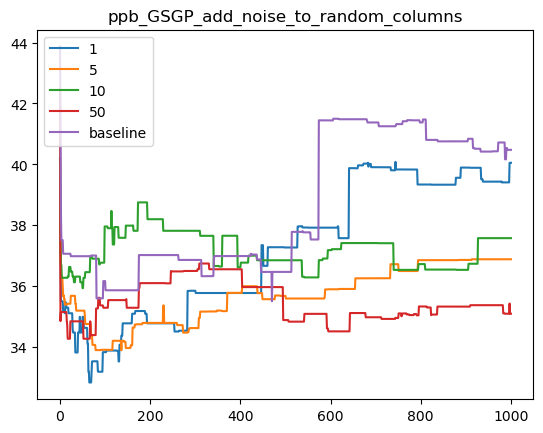

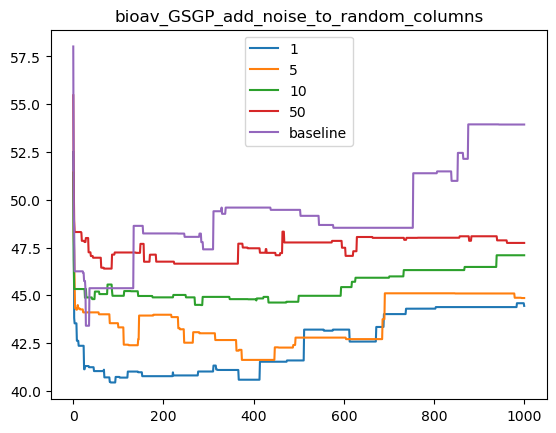

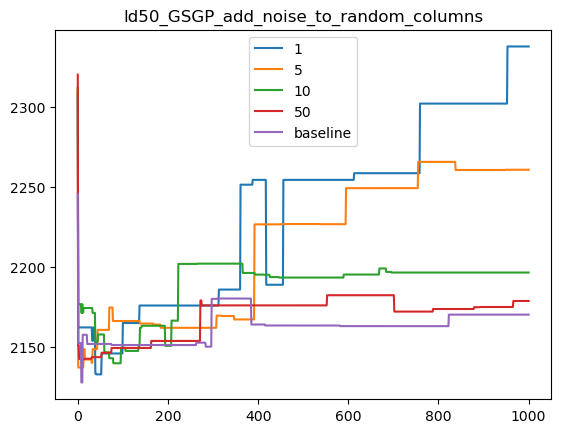

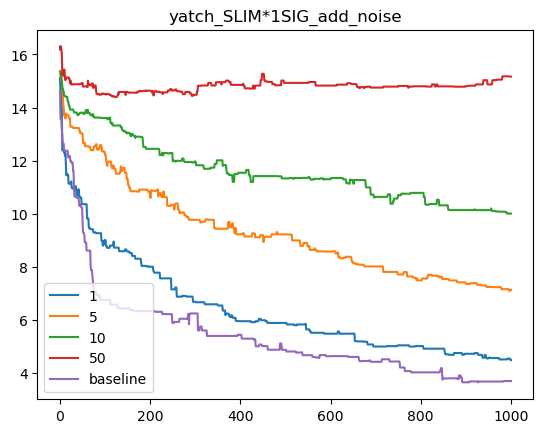

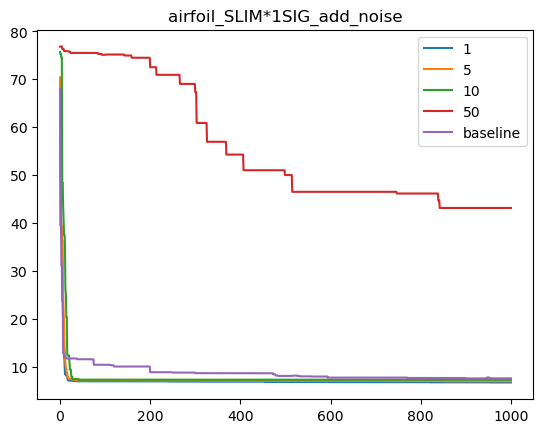

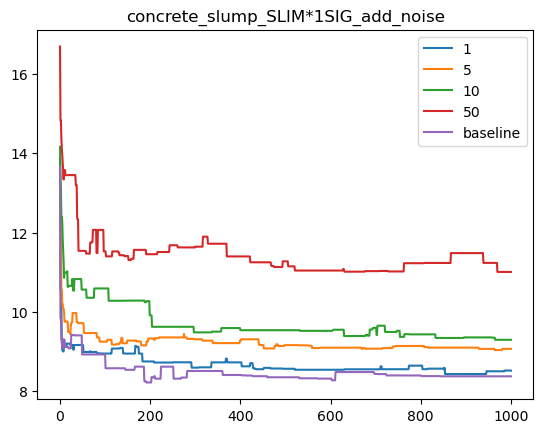

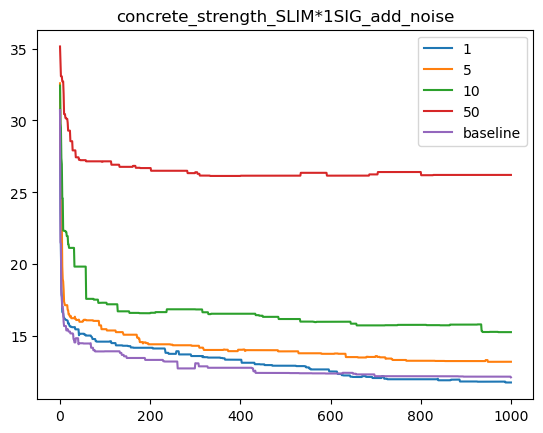

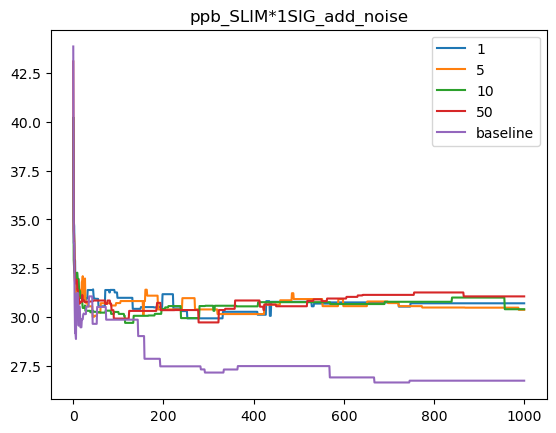

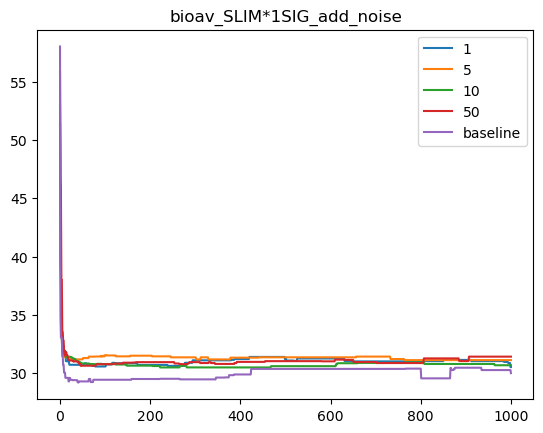

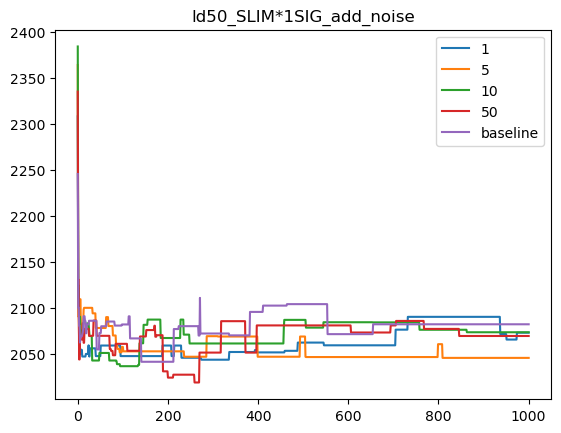

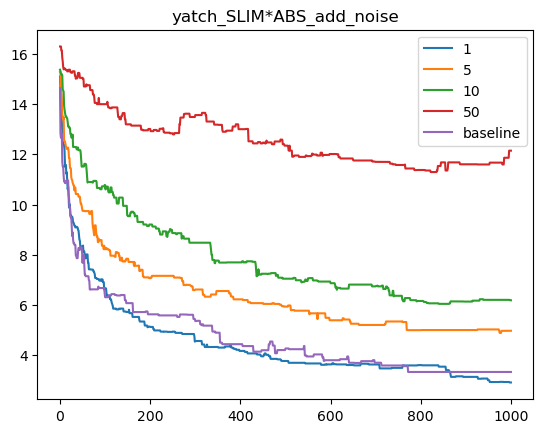

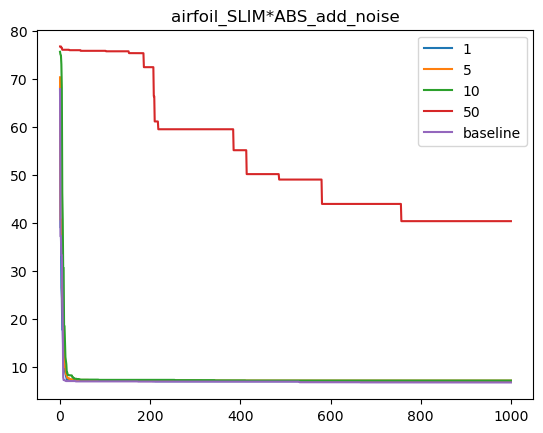

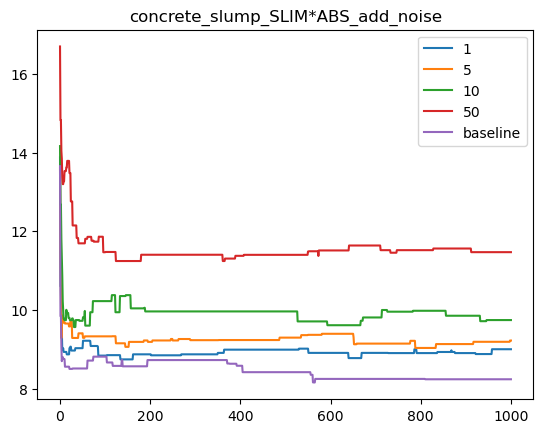

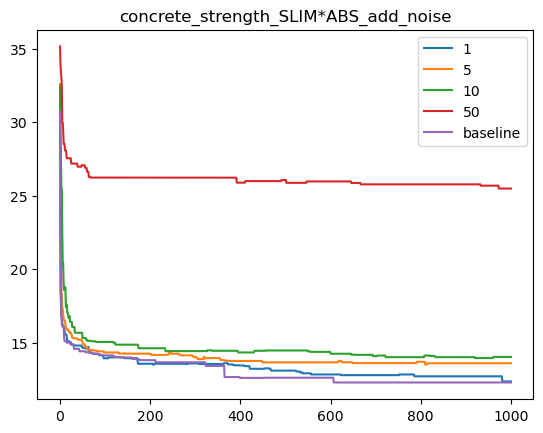

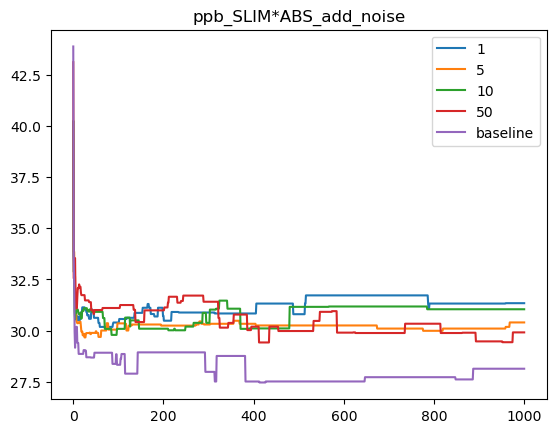

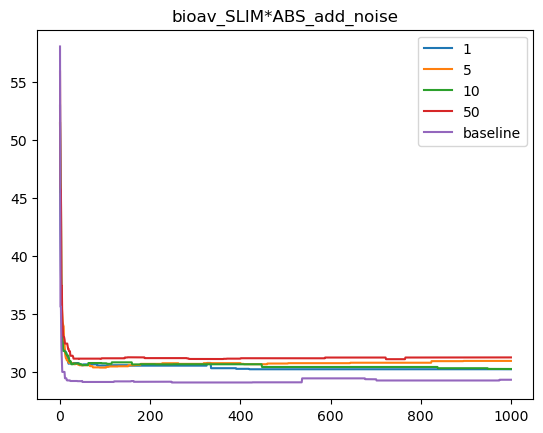

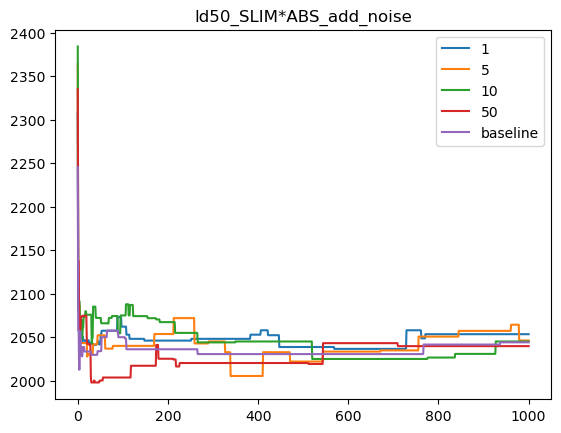

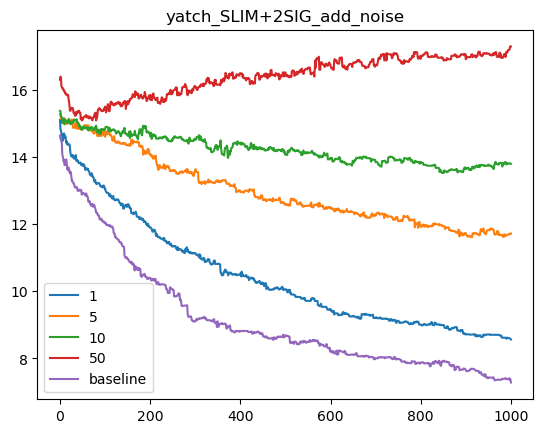

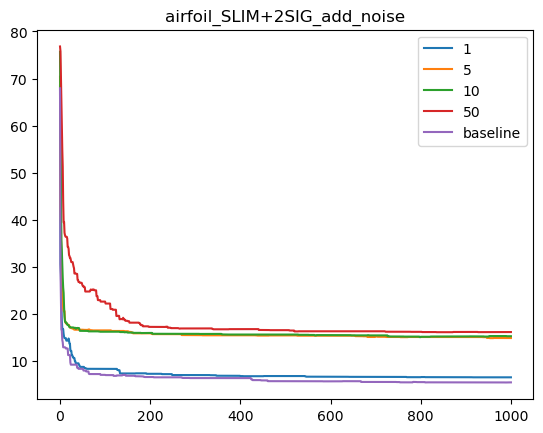

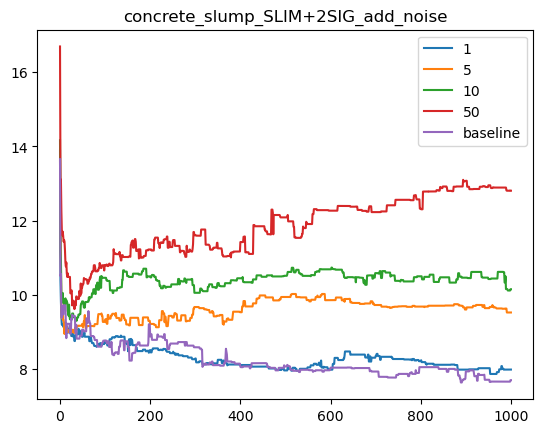

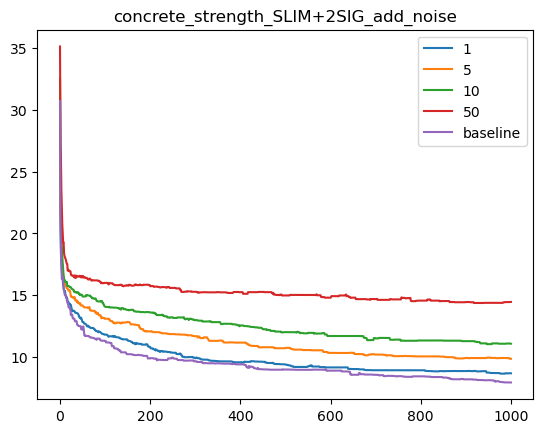

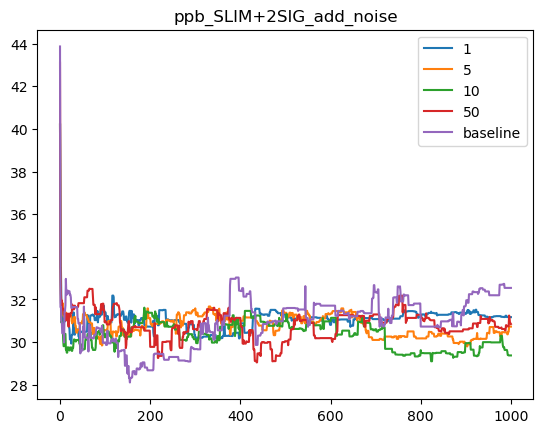

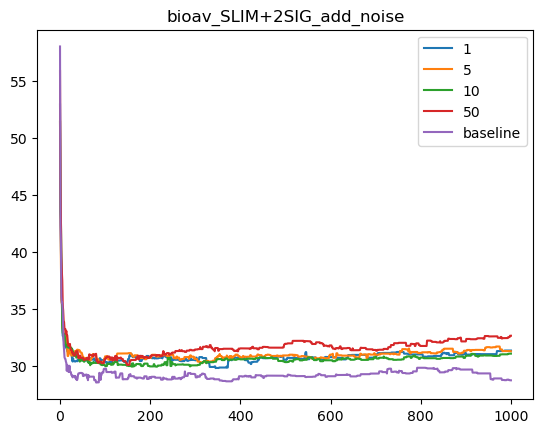

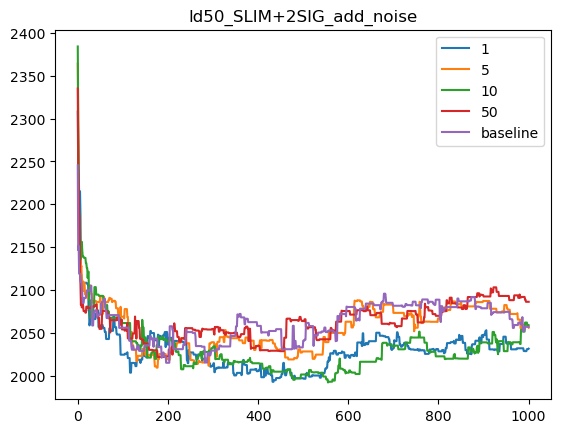

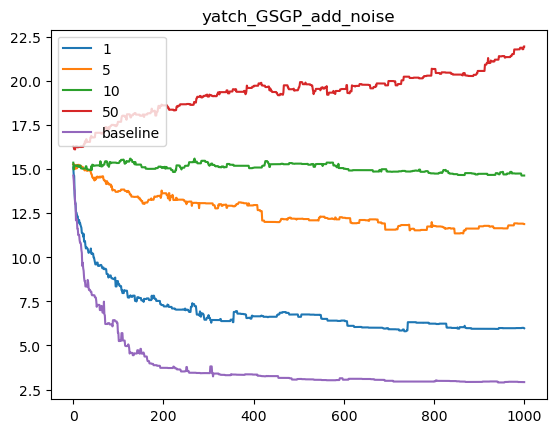

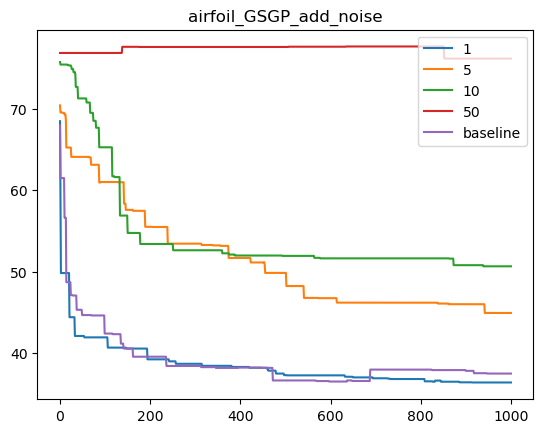

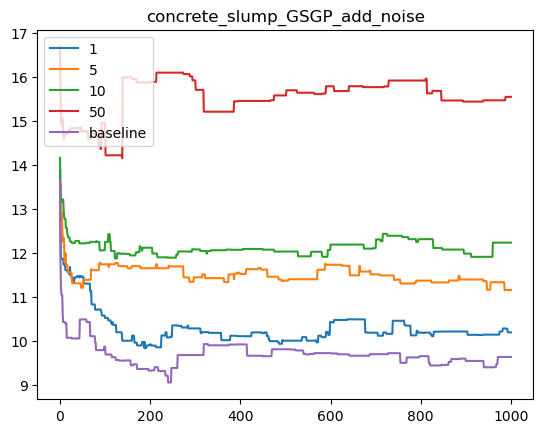

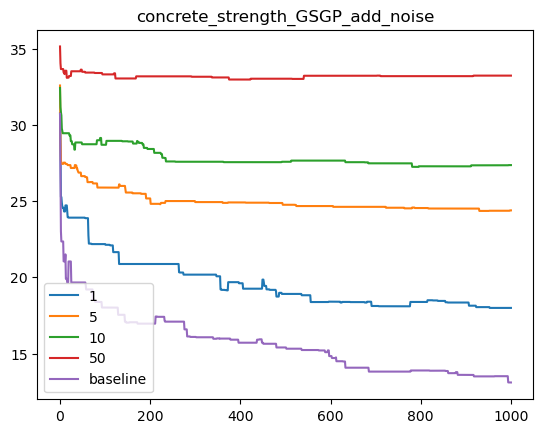

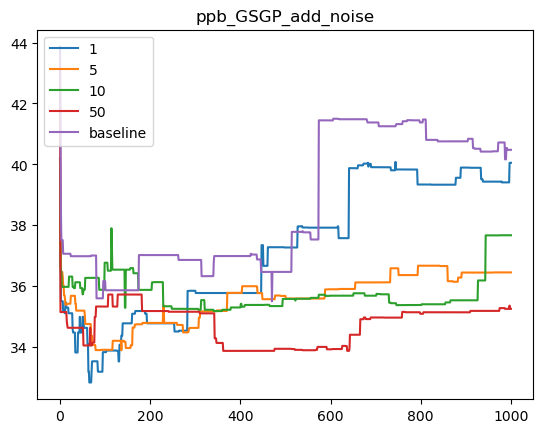

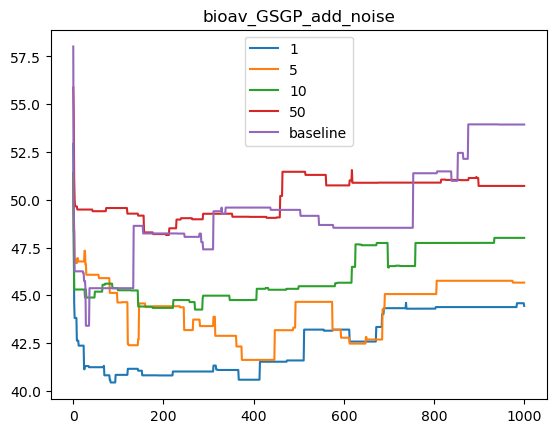

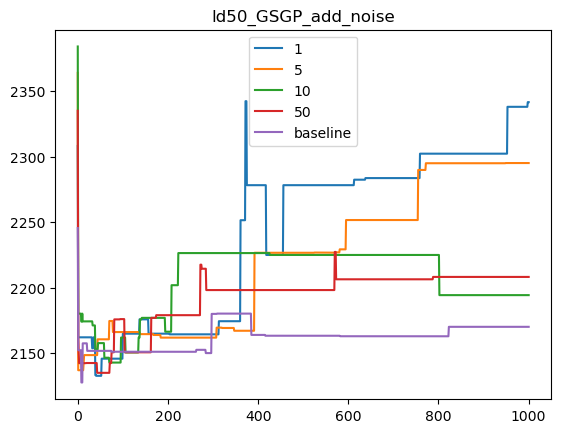

In [19]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['test_fitness'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['test_fitness'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [20]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        print(algo)
        for datas in data.dataset.unique(): 
            print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                ax = '' if pv > 0.05 else '*'
            
                print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print('\n')

add_noise_to_random_columns
SLIM*1SIG
yatch
1 : 0.31004412387652436
5 : 0.009104586694104593*
10 : 0.015490940482891756*
50 : 0.00010077152813308912*
airfoil
1 : 0.5219695053554594
5 : 0.2291551655222669
10 : 0.08870026815186603
50 : 8.856314370151679e-05*
concrete_slump
1 : 0.48219166095493815
5 : 0.09470997485228519
10 : 0.11471386476194391
50 : 0.09470997485228519
concrete_strength
1 : 0.48219166095493815
5 : 0.04394222286967825*
10 : 0.0023238003463012438*
50 : 5.234536616695991e-05*
ppb
1 : 0.17423795411945142
5 : 0.20586864962849072
10 : 0.11471386476194391
50 : 0.05879775704449843
bioav
1 : 0.2291551655222669
5 : 0.5633701759173014
10 : 0.6732665200106236
50 : 0.9875396431792867
ld50
1 : 0.7906278567101722
5 : 0.6506179356895665
10 : 0.6732665200106236
50 : 0.7194457366855653


SLIM*ABS
yatch
1 : 0.9875396431792867
5 : 0.3733636355831279
10 : 0.09470997485228519
50 : 0.00021448233973810725*
airfoil
1 : 0.2953929127117212
5 : 0.14638597411348
10 : 0.06766474200791676
50 : 0.00010

In [28]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count if pv > 0.05 else count + 1
            
                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 7
SLIM*ABS : 4
SLIM+2SIG : 14
GSGP : 12
add_noise
SLIM*1SIG : 9
SLIM*ABS : 9
SLIM+2SIG : 16
GSGP : 13


In [30]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in [ 1,  5, 10]:
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count if pv > 0.05 else count + 1
            
                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 4
SLIM*ABS : 1
SLIM+2SIG : 9
GSGP : 8


add_noise
SLIM*1SIG : 5
SLIM*ABS : 4
SLIM+2SIG : 11
GSGP : 9




In [31]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in [ 50]:
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count if pv > 0.05 else count + 1
            
                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 3
SLIM*ABS : 3
SLIM+2SIG : 5
GSGP : 4


add_noise
SLIM*1SIG : 4
SLIM*ABS : 5
SLIM+2SIG : 5
GSGP : 4




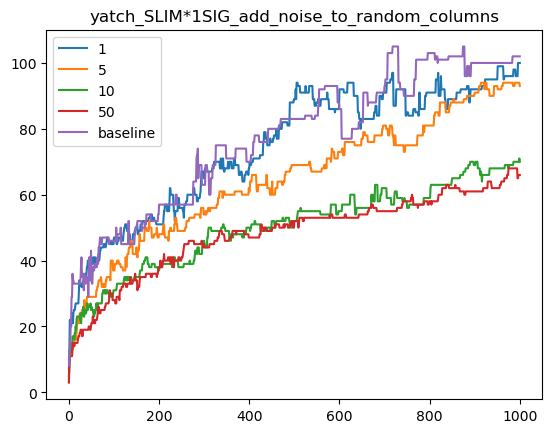

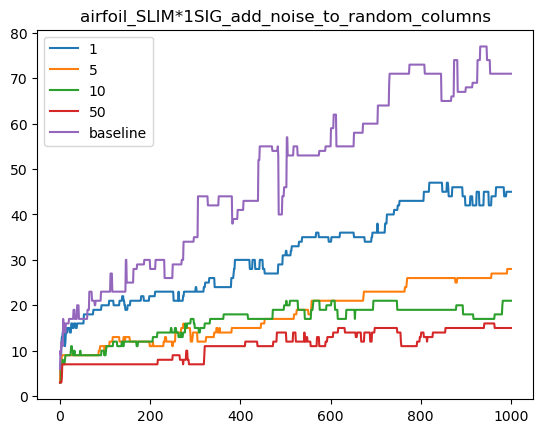

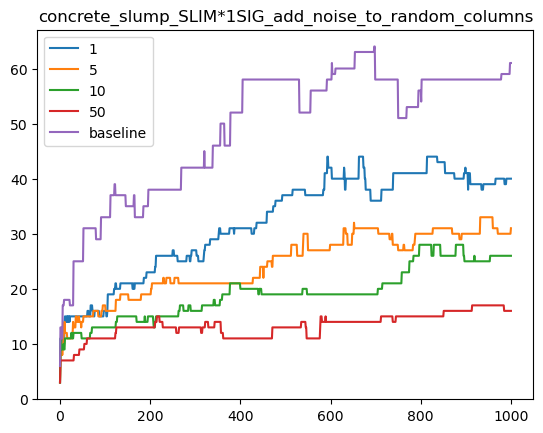

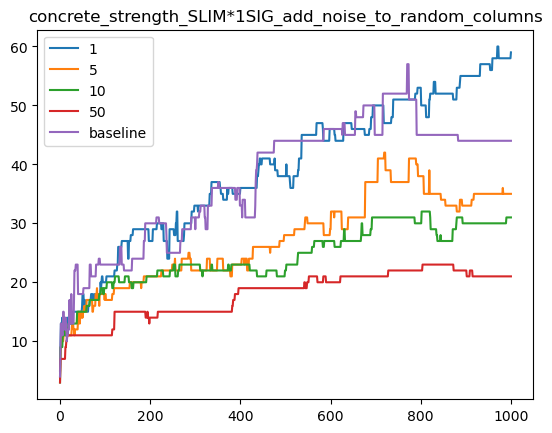

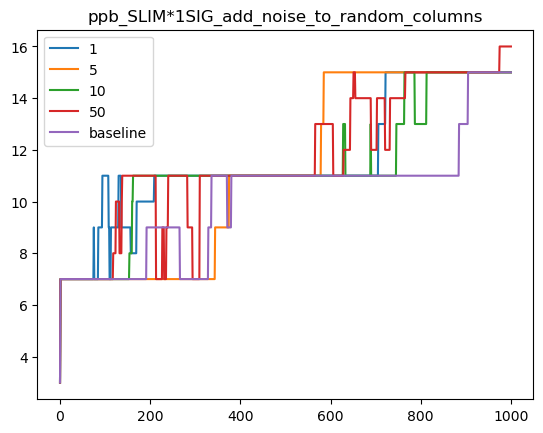

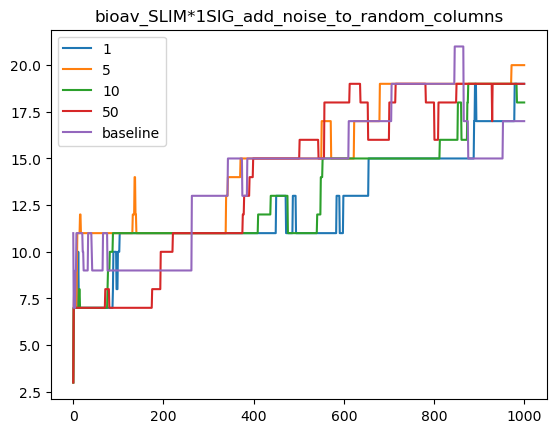

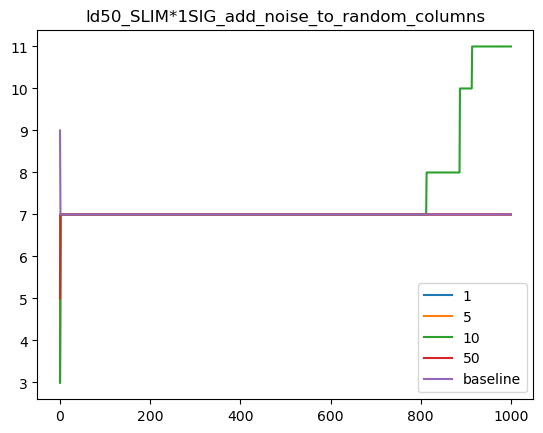

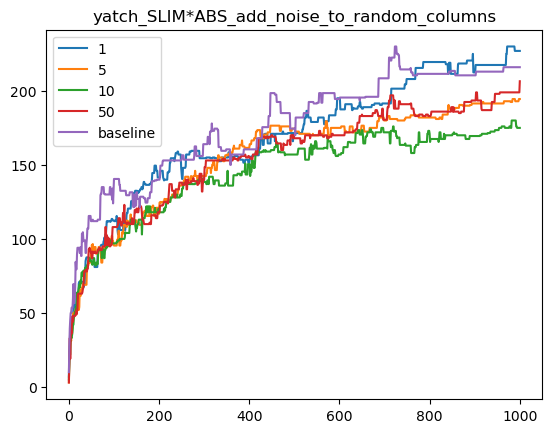

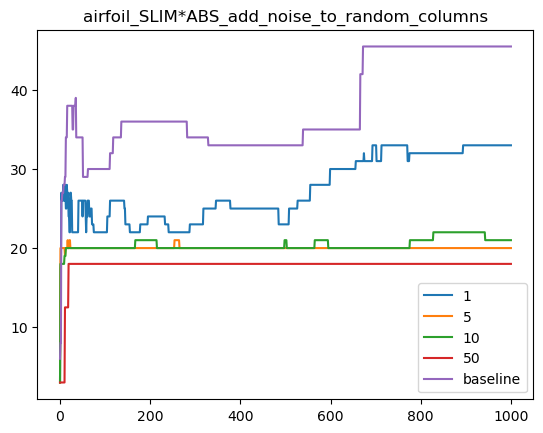

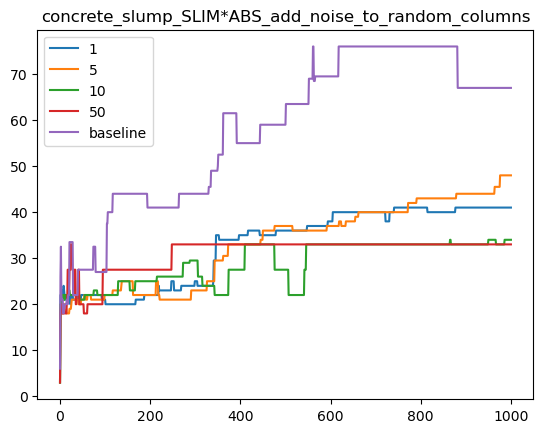

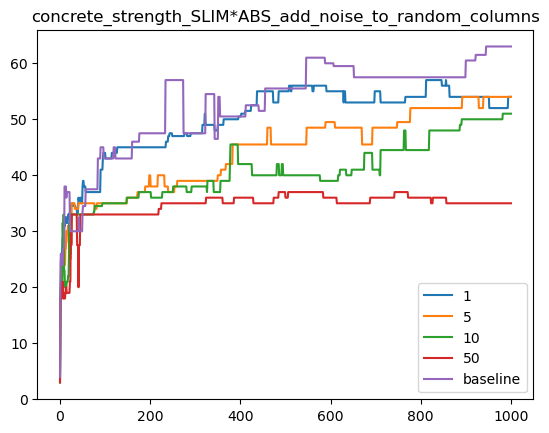

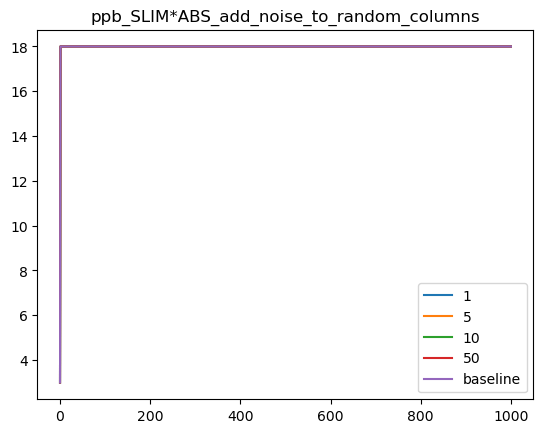

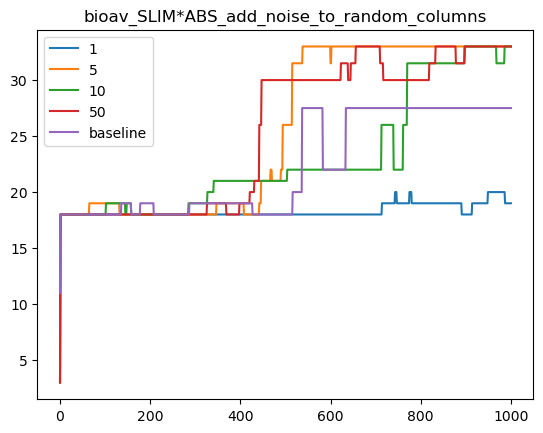

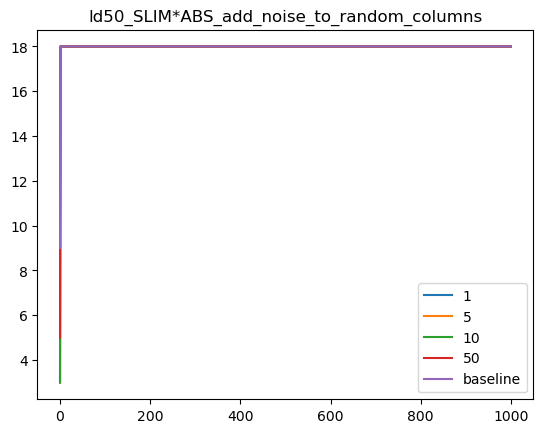

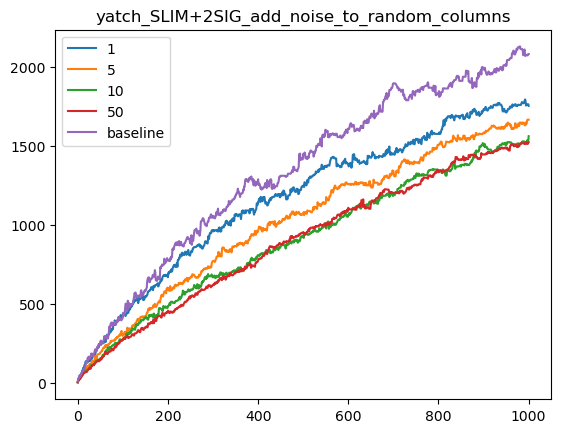

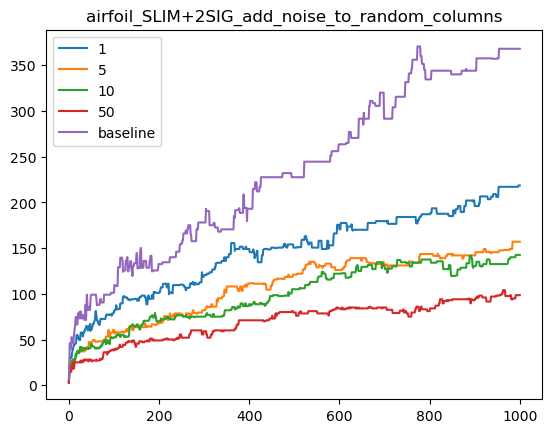

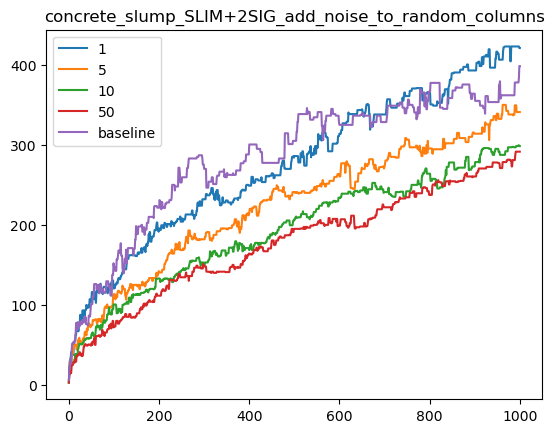

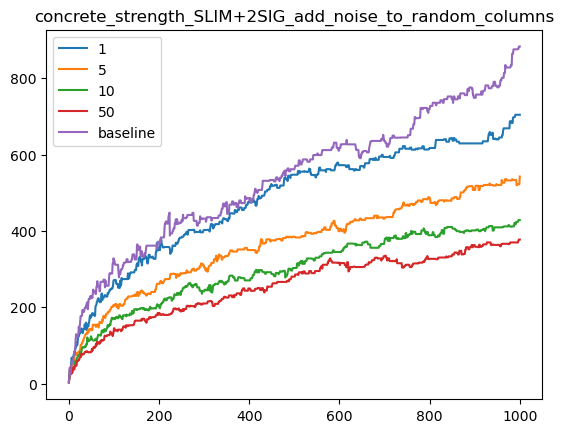

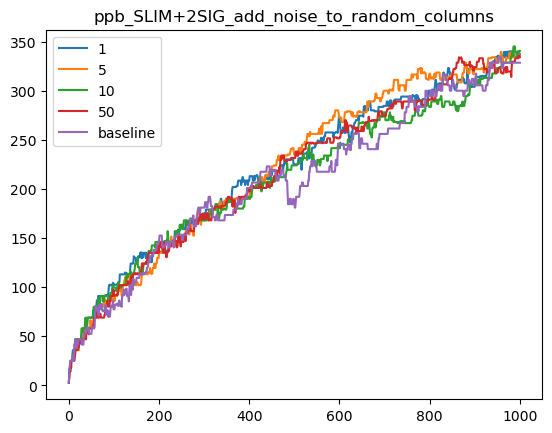

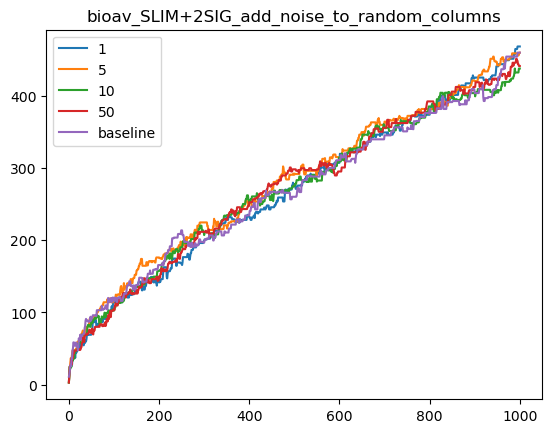

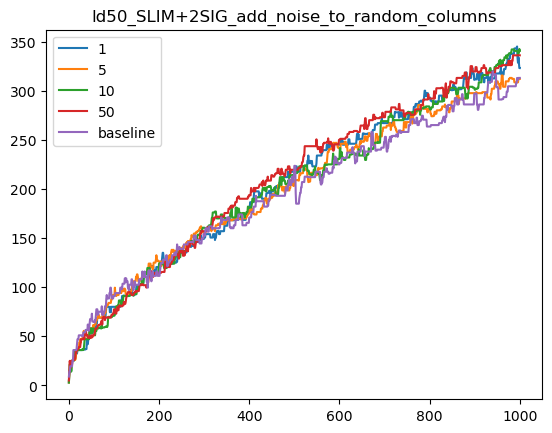

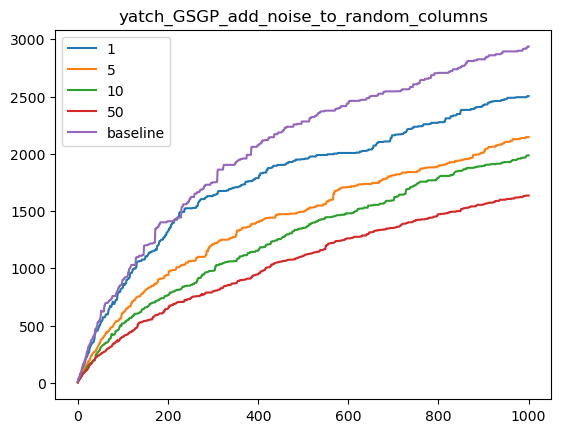

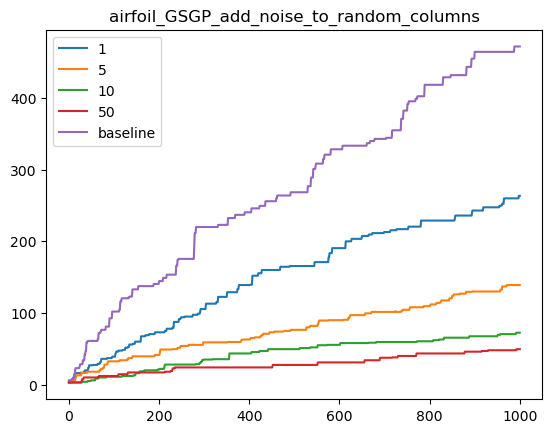

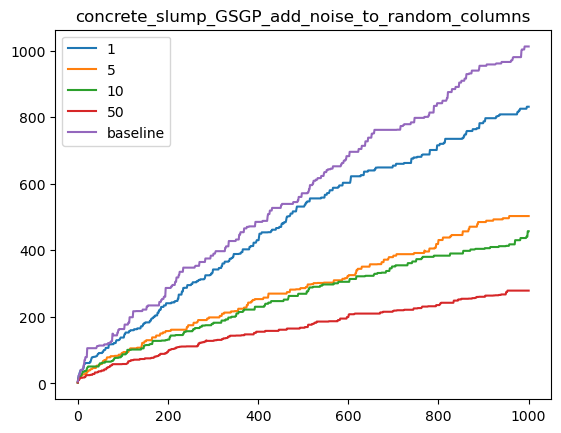

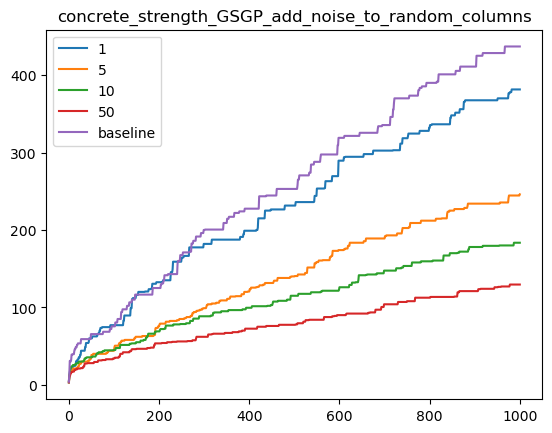

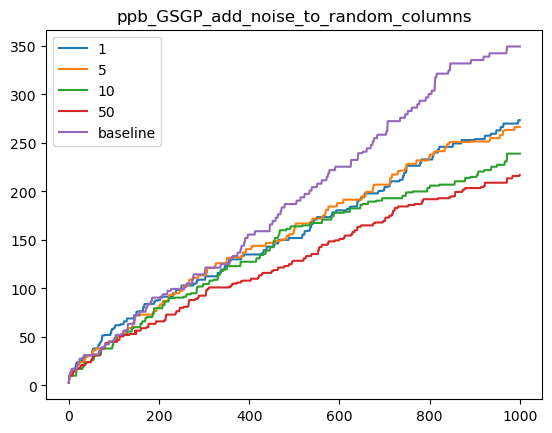

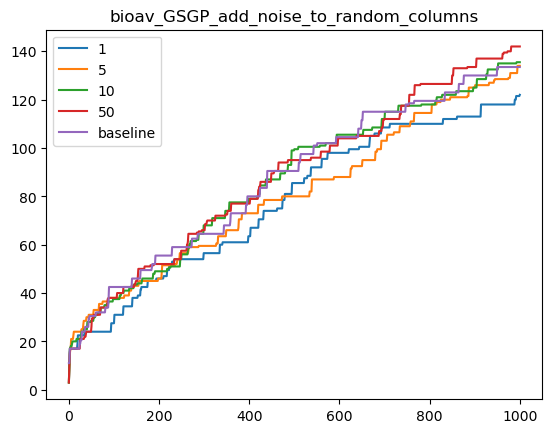

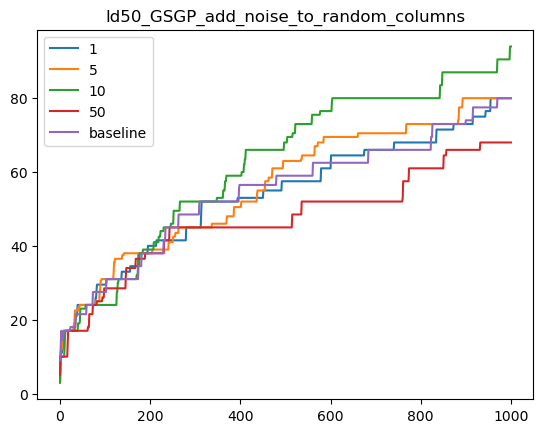

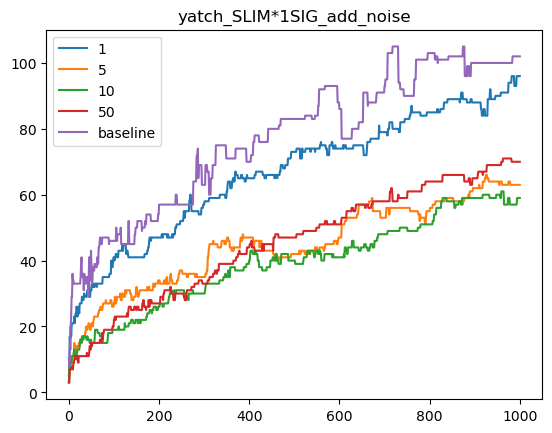

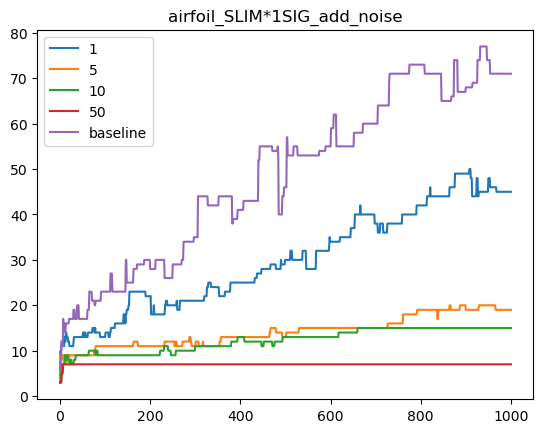

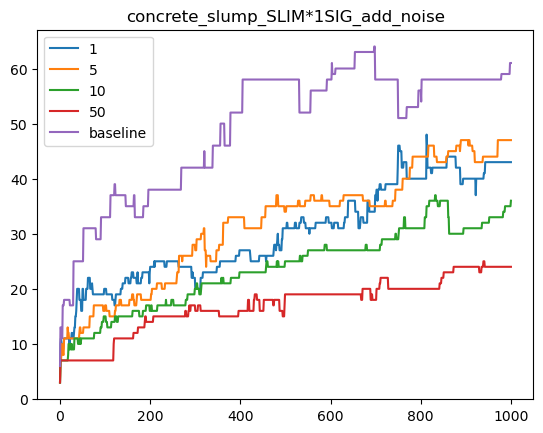

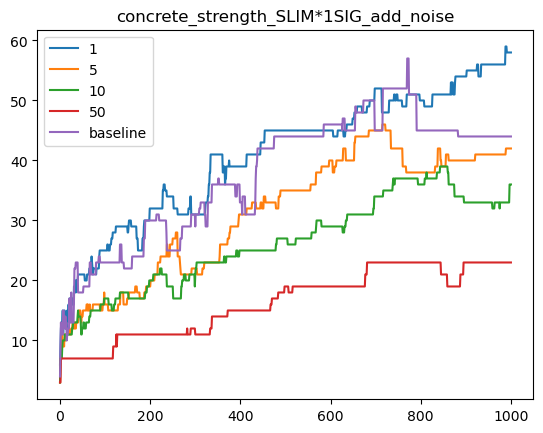

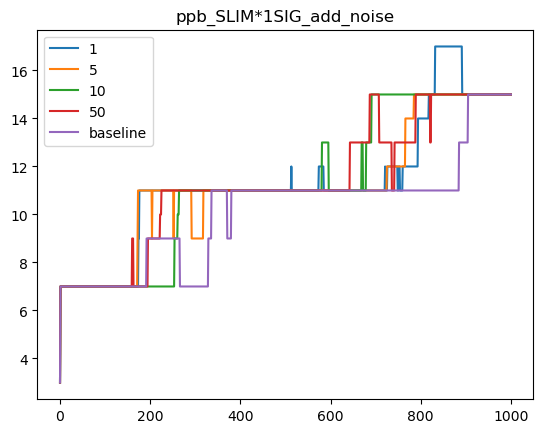

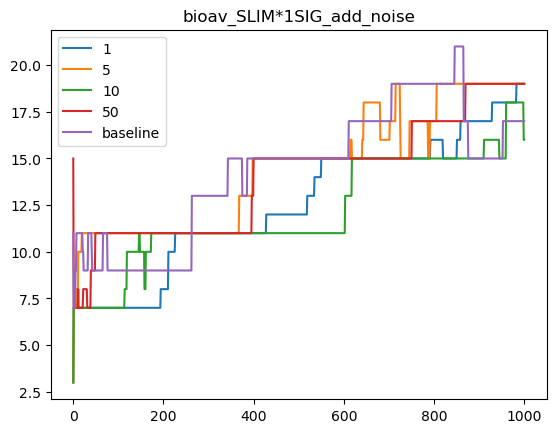

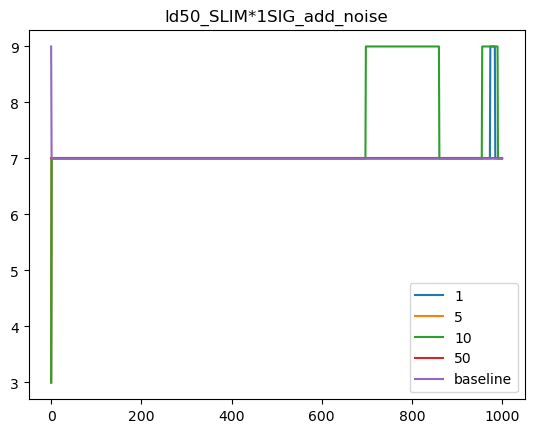

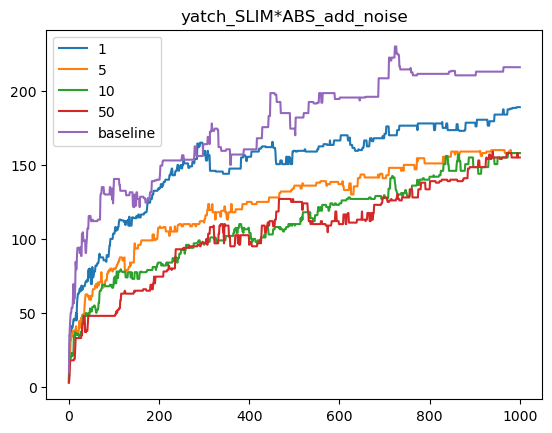

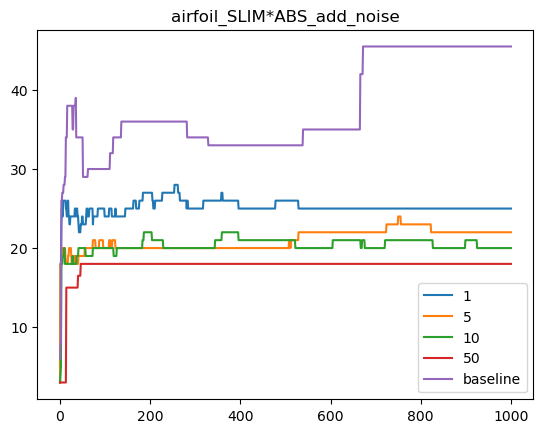

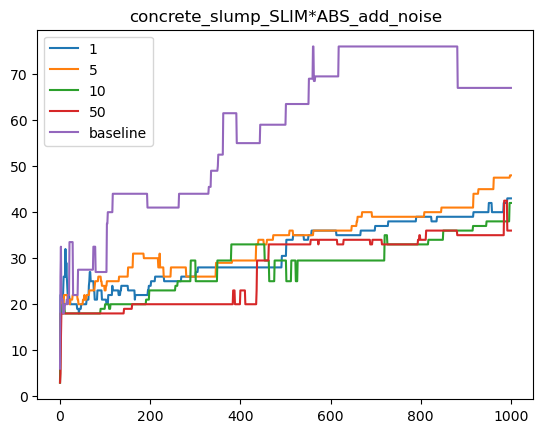

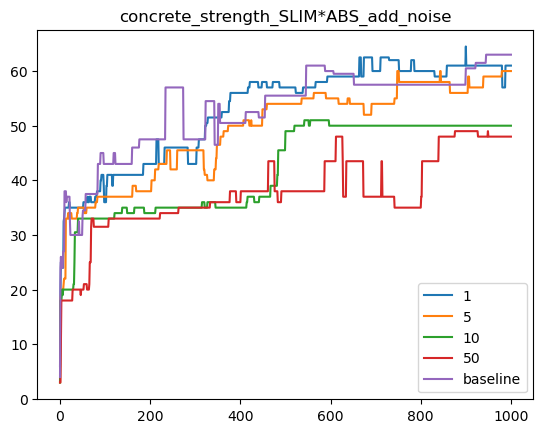

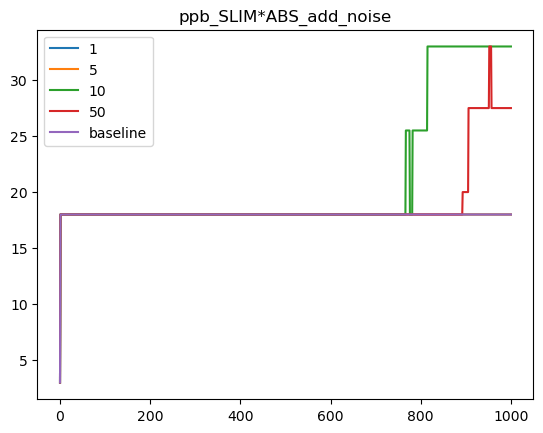

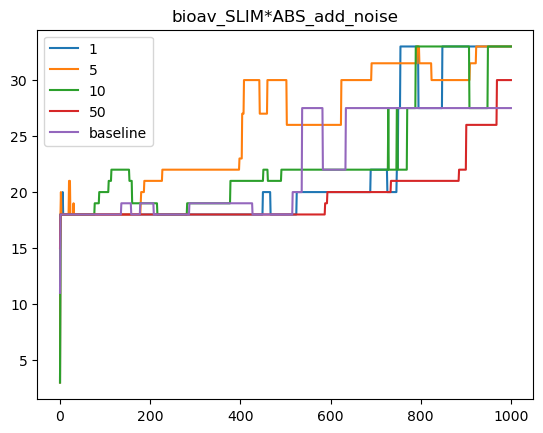

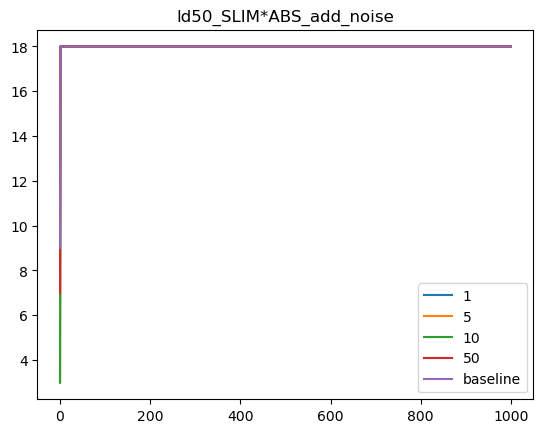

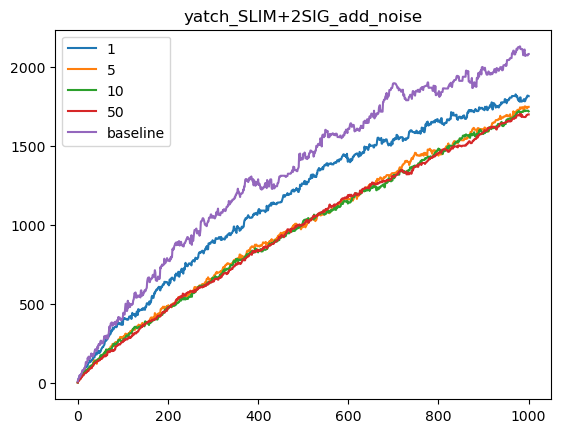

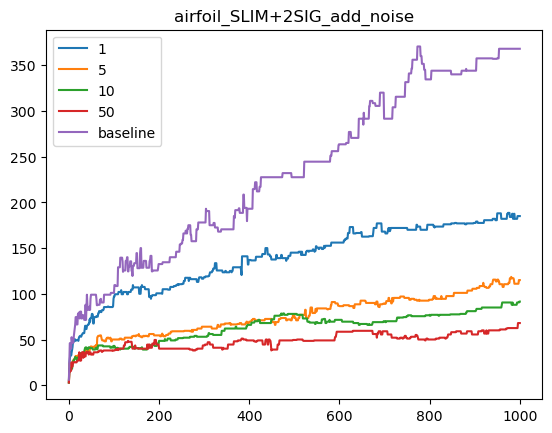

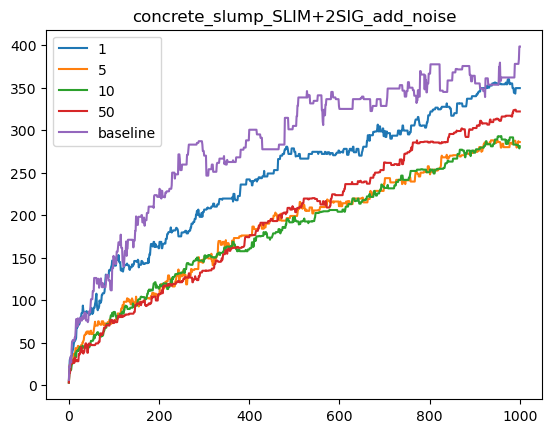

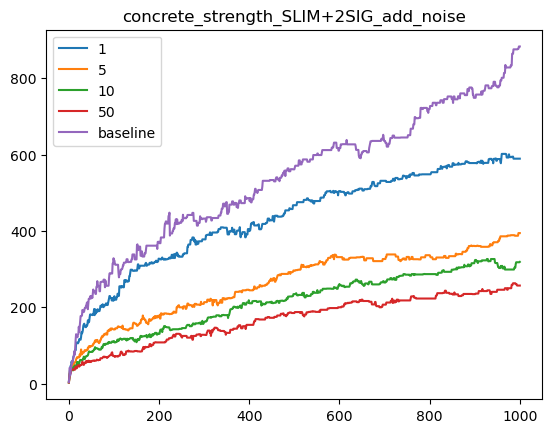

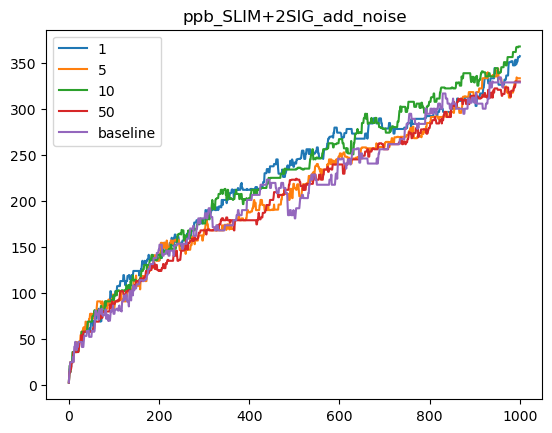

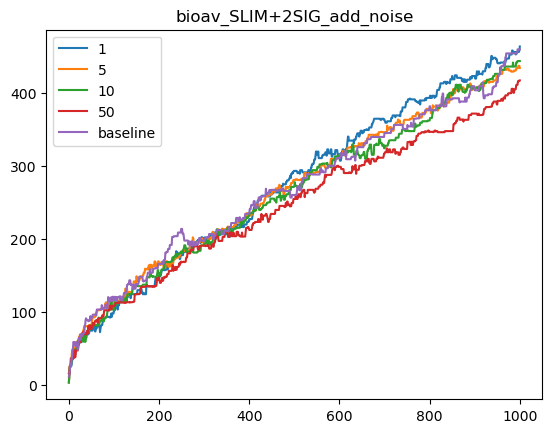

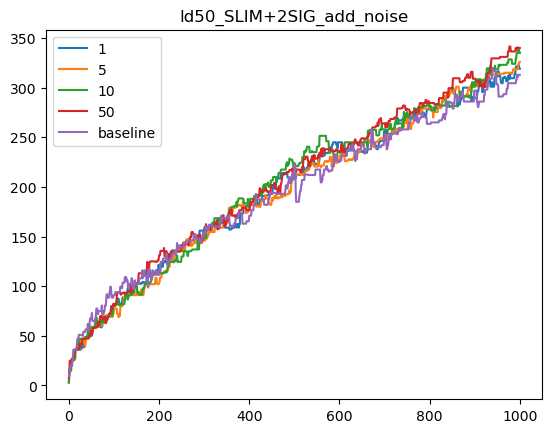

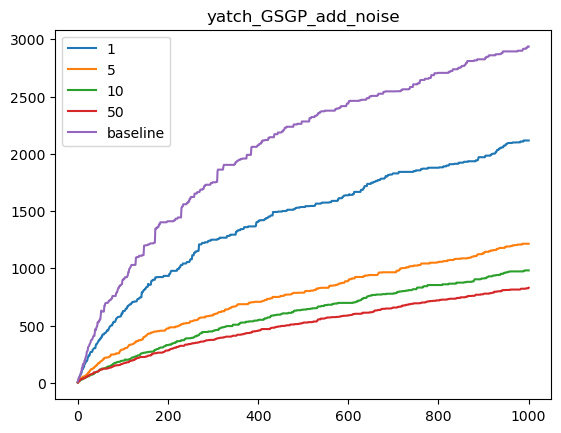

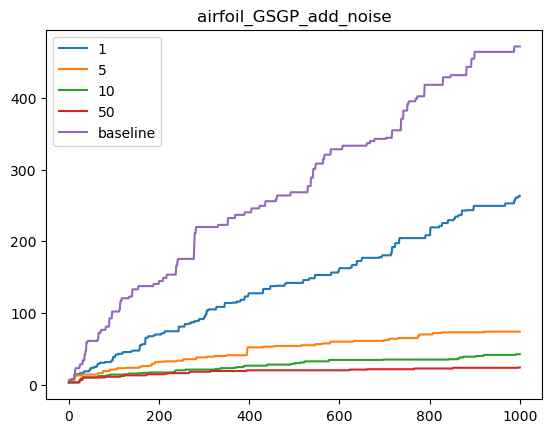

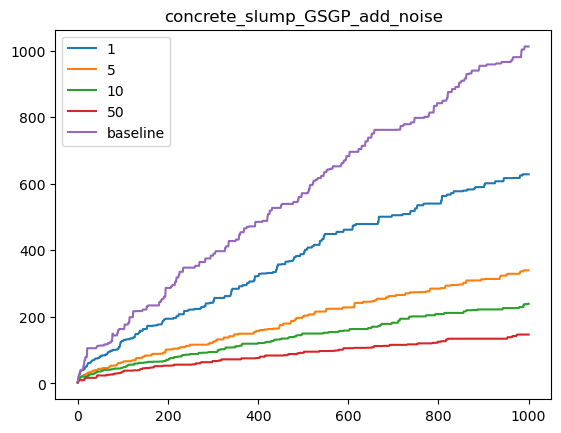

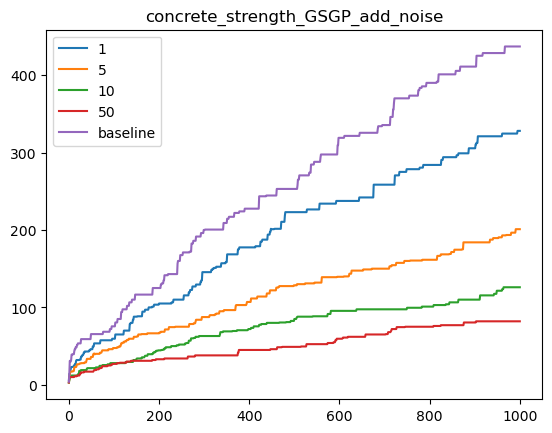

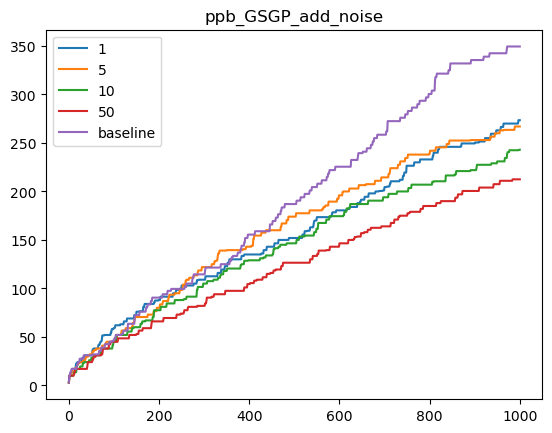

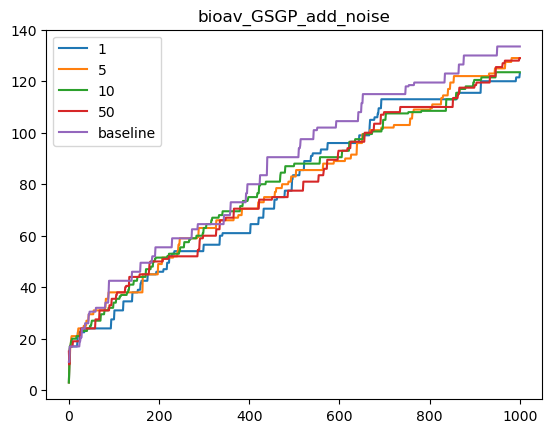

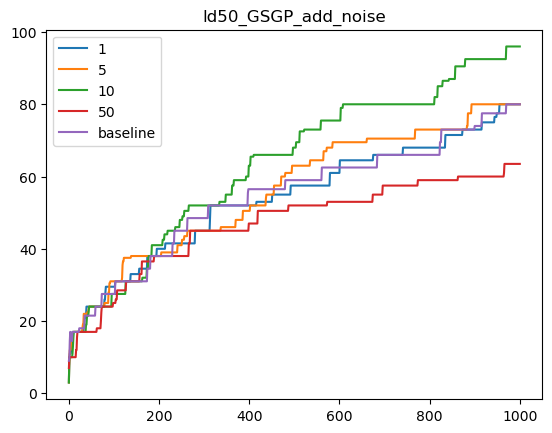

In [21]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['elite_size'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['elite_size'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [4]:
counts = pd.read_csv('../main/log/_20241018.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})

In [5]:
counts["count_v"] = counts.counts_v.apply(lambda x: sum([int(el) for el in x]))

In [6]:
counts.head()

algo                         experiment_id  noise dataset counts_v  \
0  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [1]   
1  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [3]   
2  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch     [10]   
3  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [5]   
4  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [6]   

                    experiment  count_v  
0  add_noise_to_random_columns        1  
1  add_noise_to_random_columns        3  
2  add_noise_to_random_columns       10  
3  add_noise_to_random_columns        5  
4  add_noise_to_random_columns        6

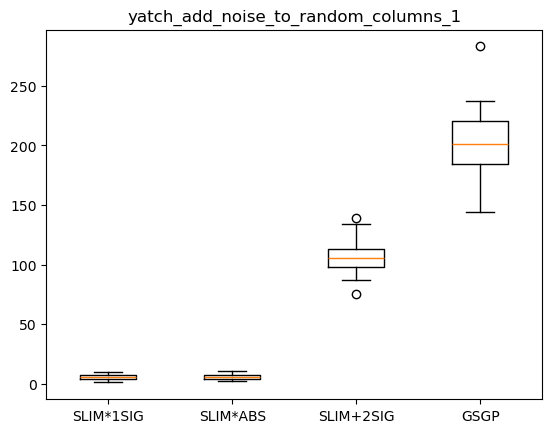

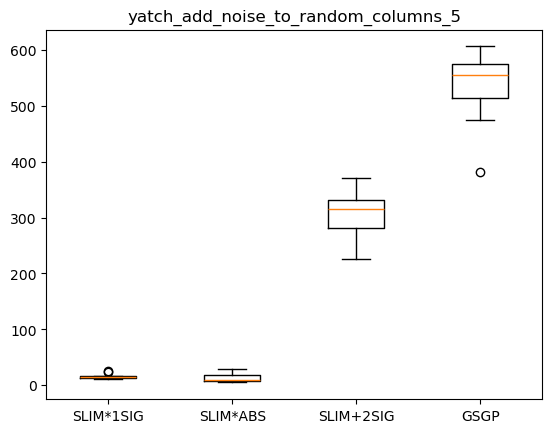

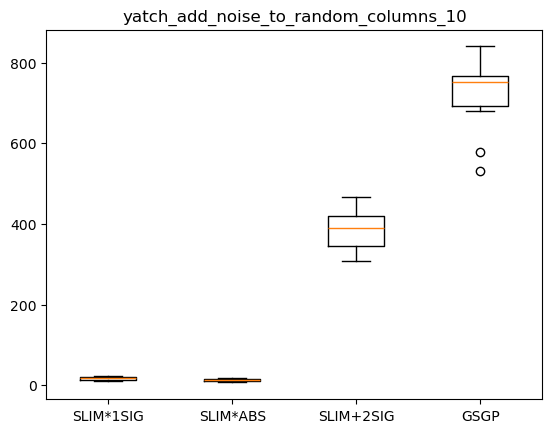

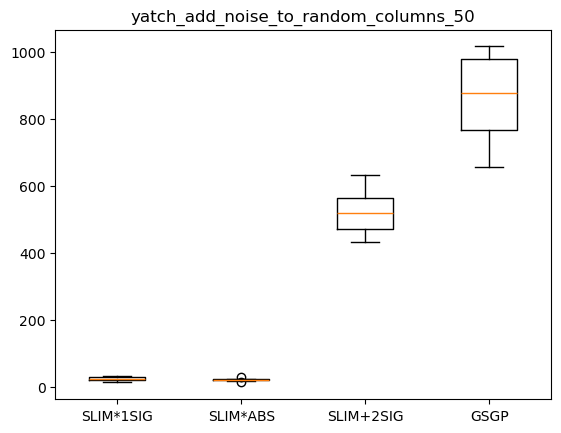

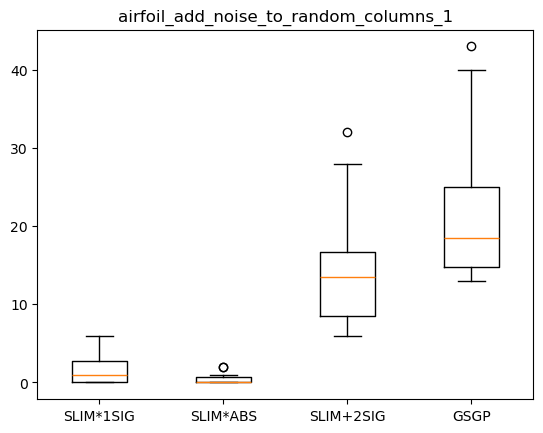

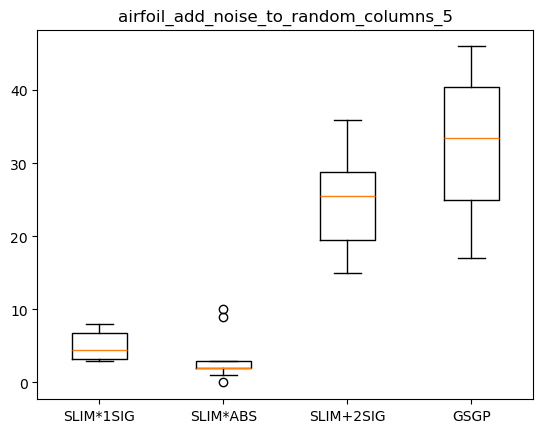

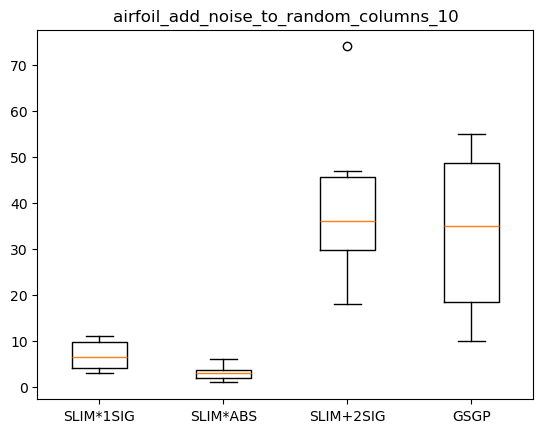

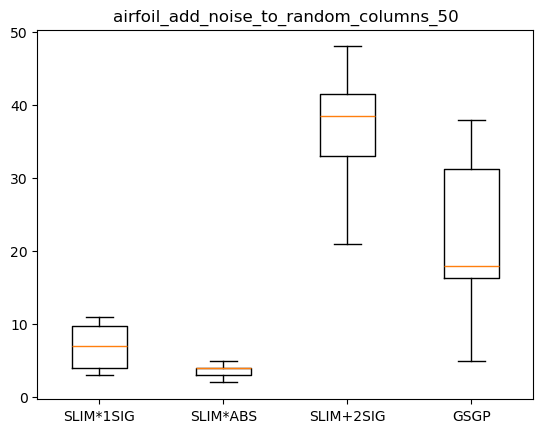

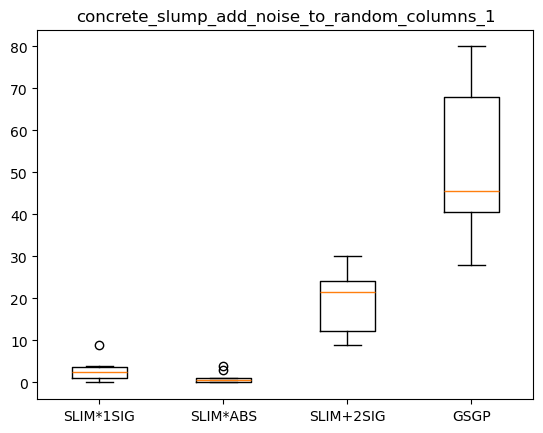

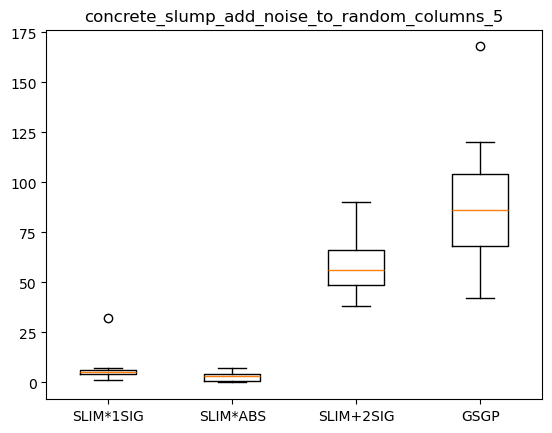

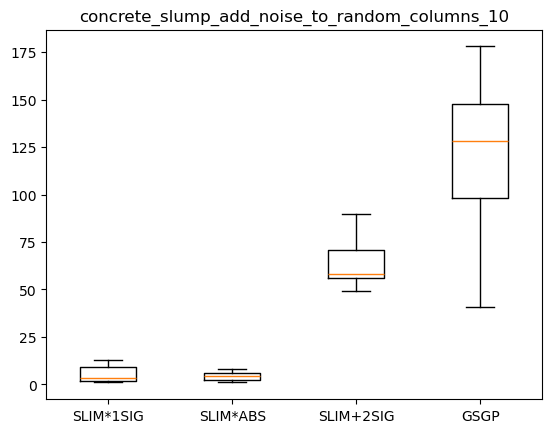

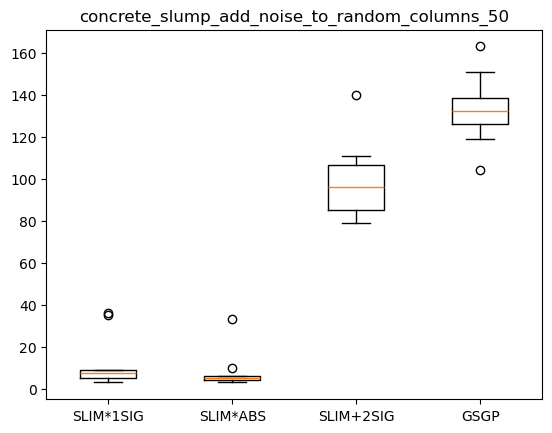

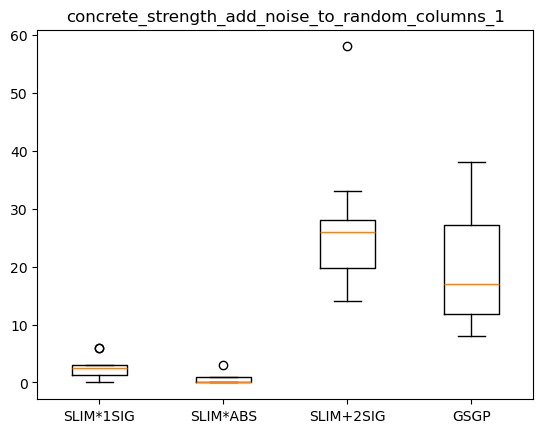

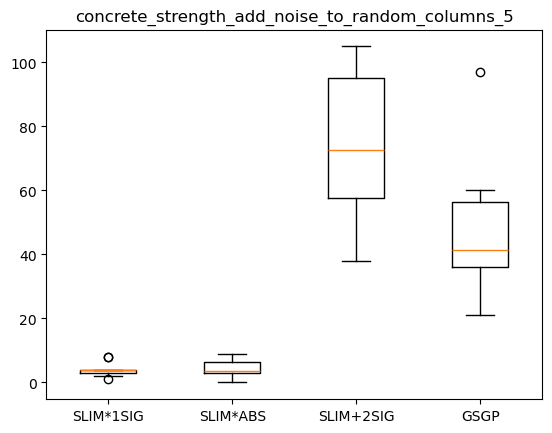

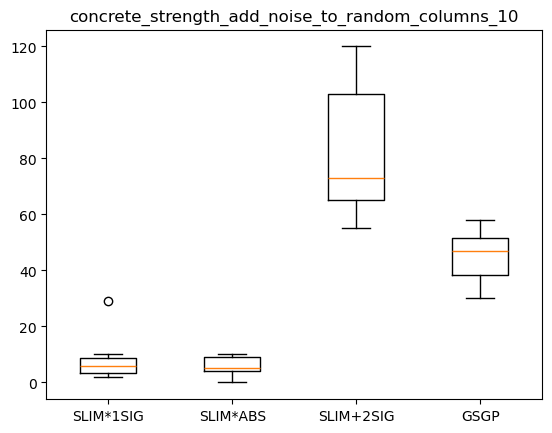

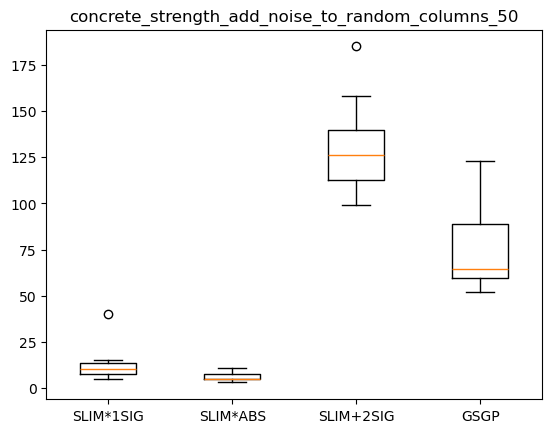

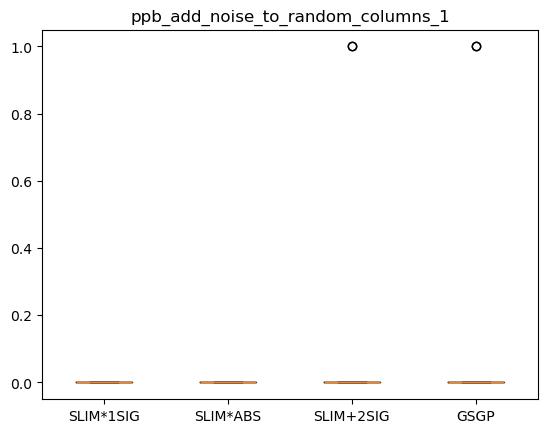

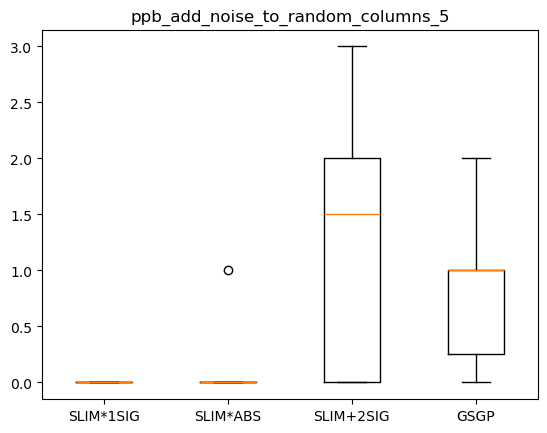

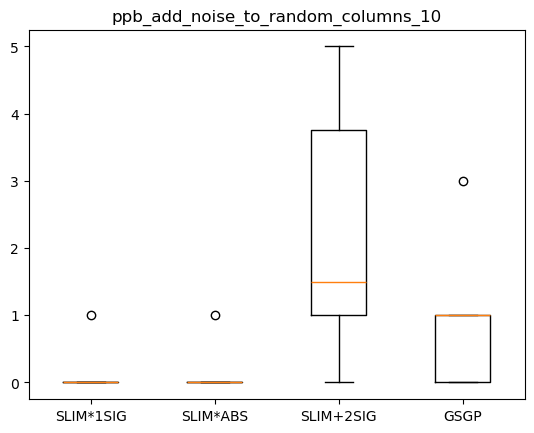

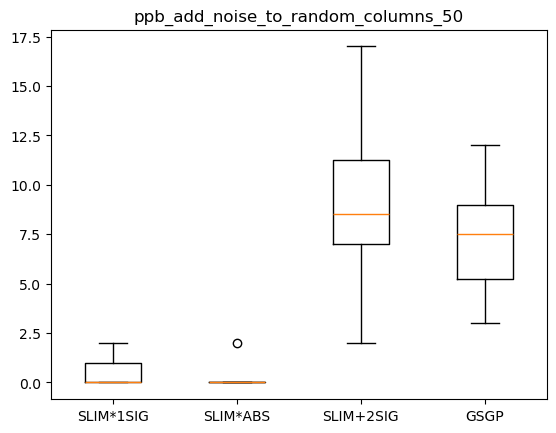

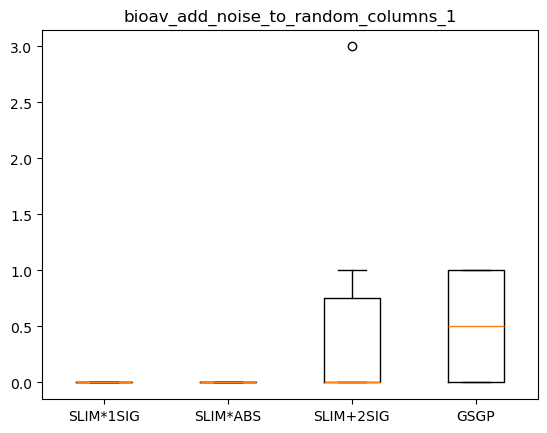

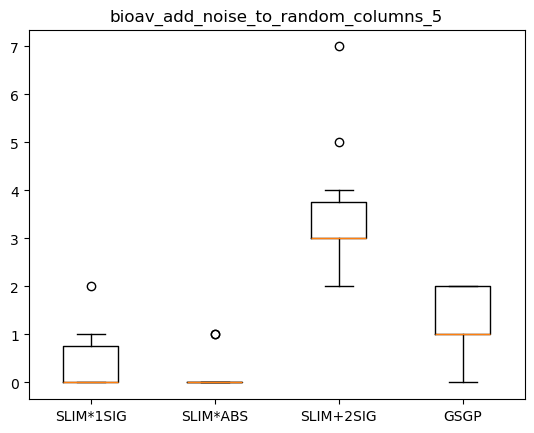

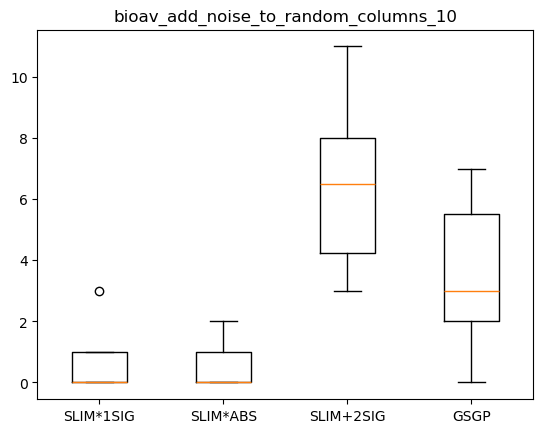

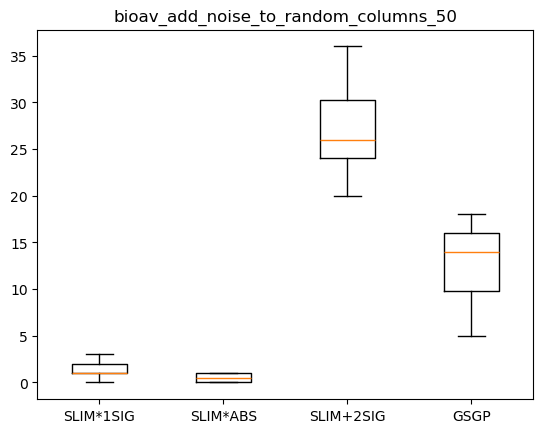

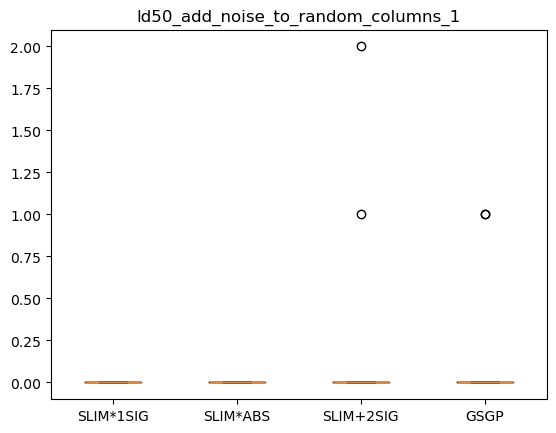

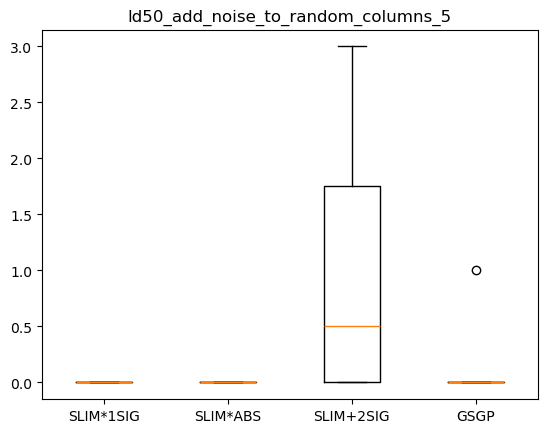

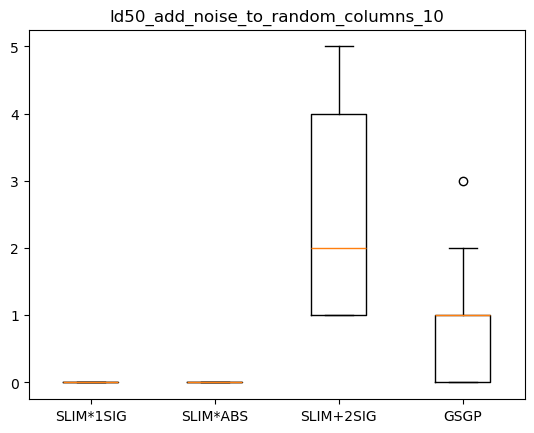

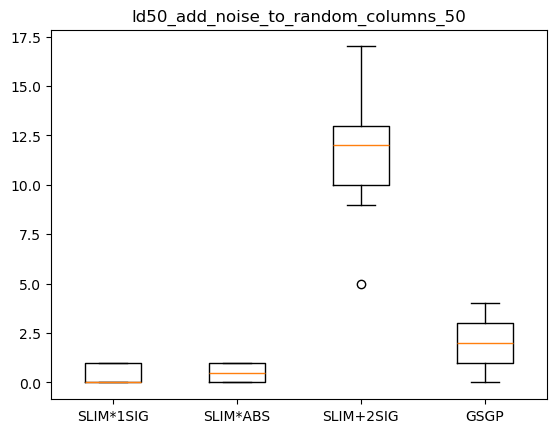

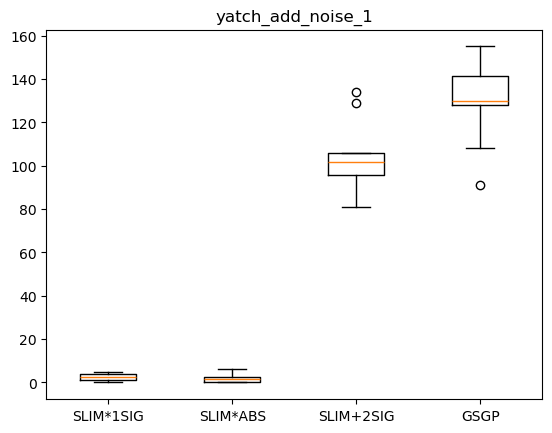

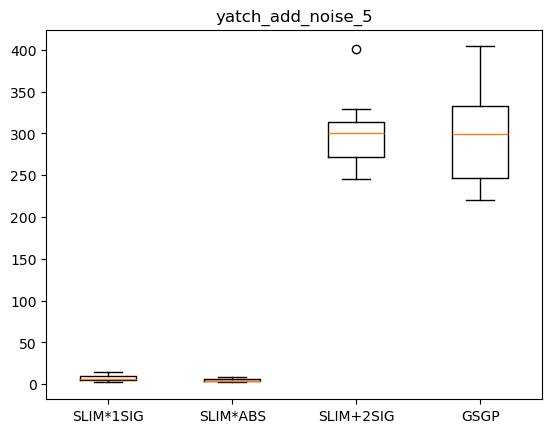

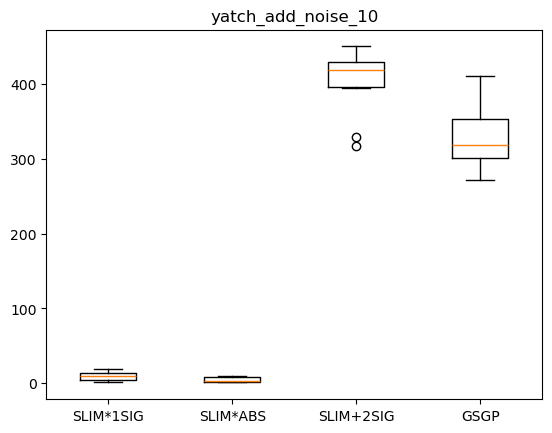

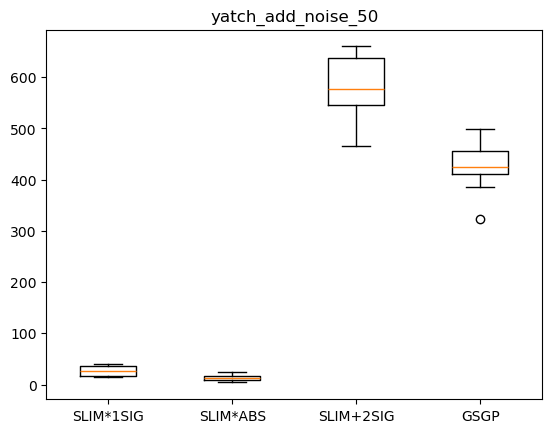

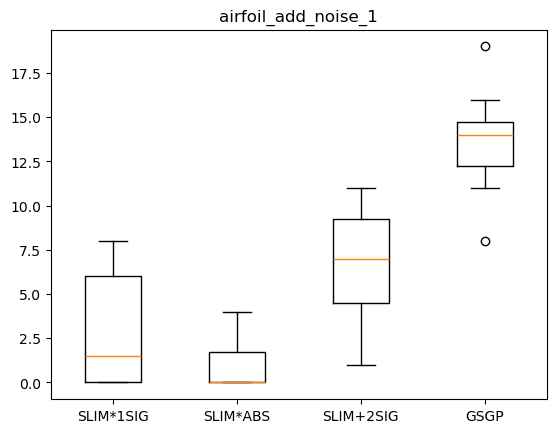

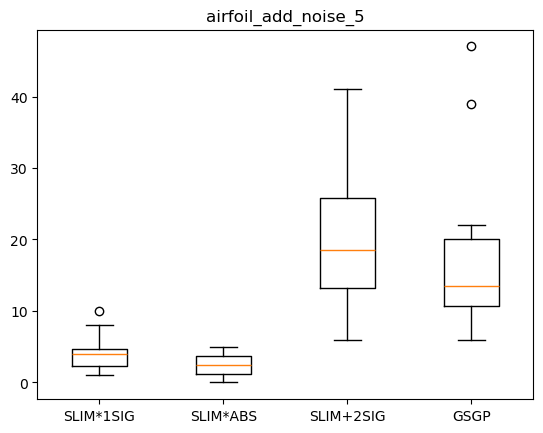

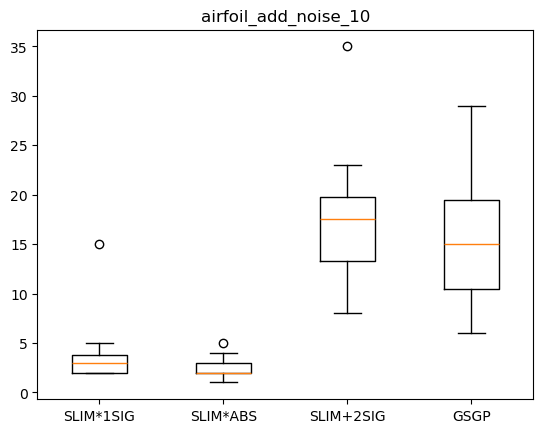

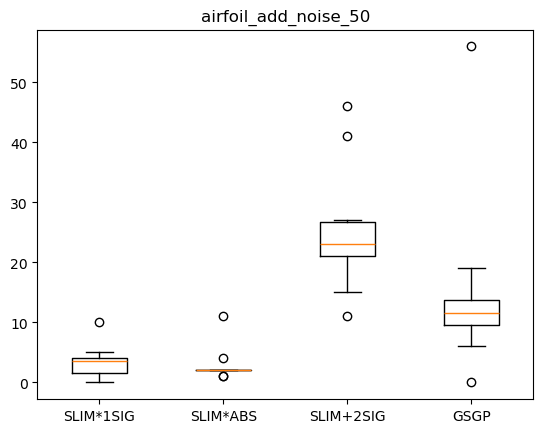

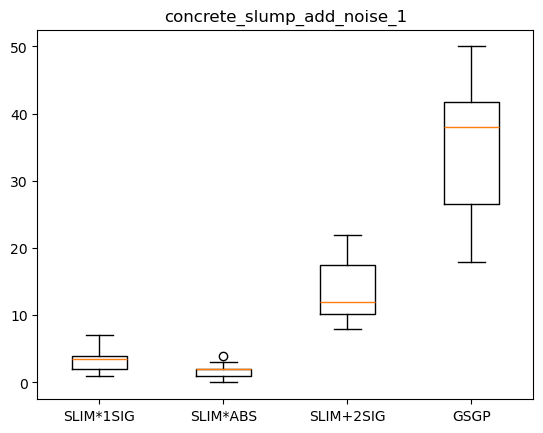

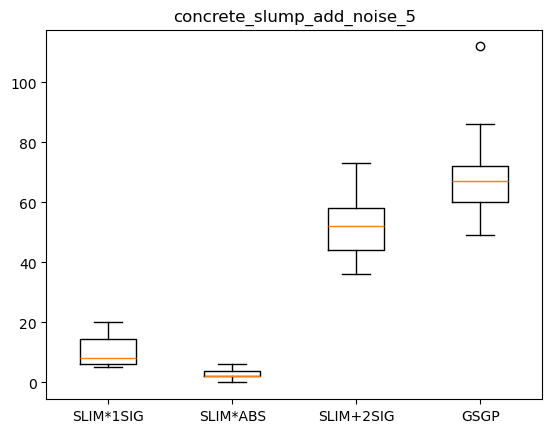

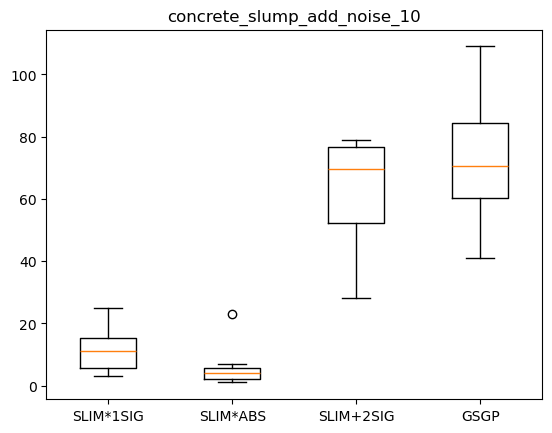

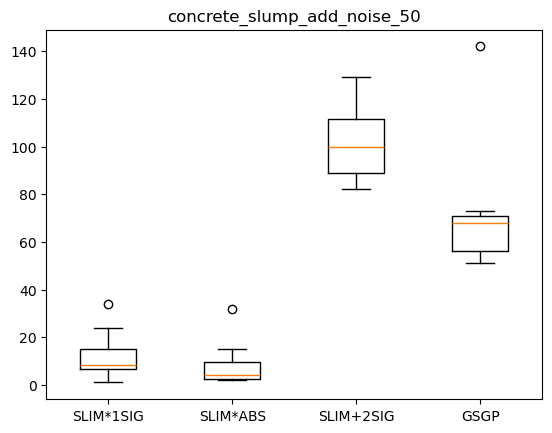

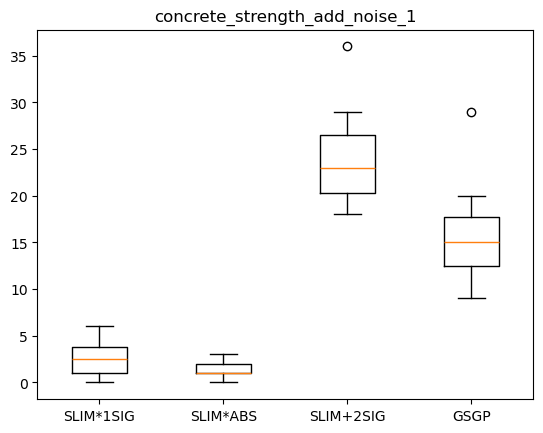

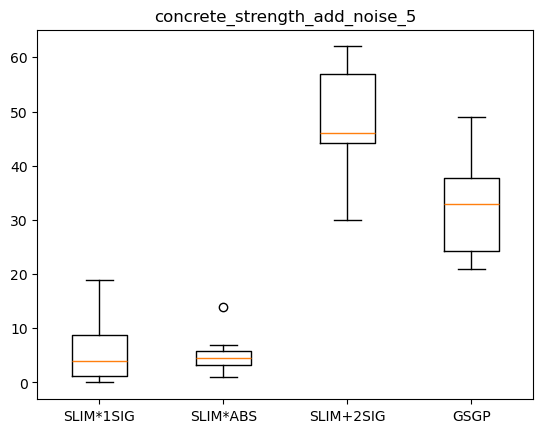

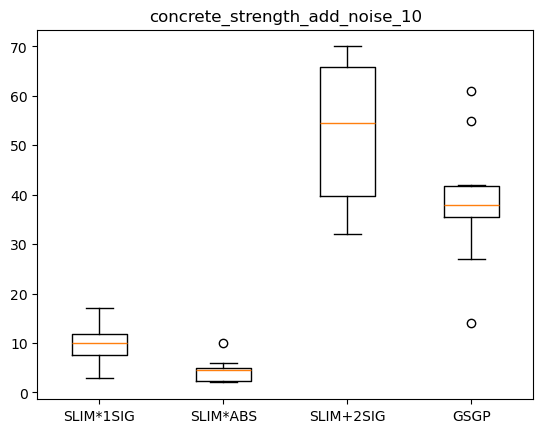

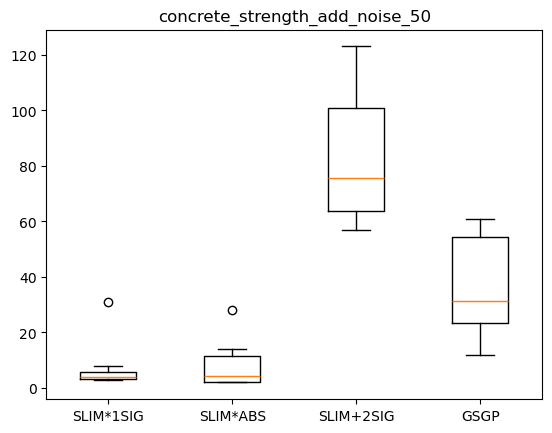

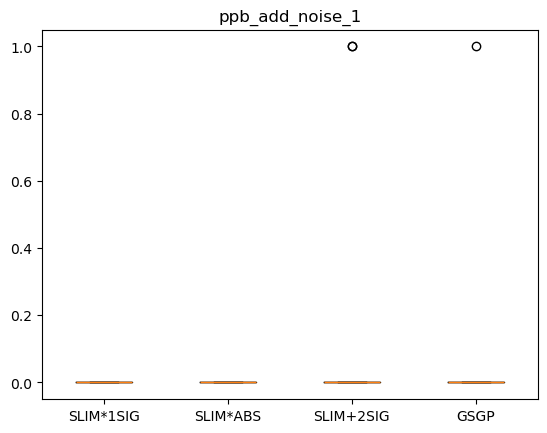

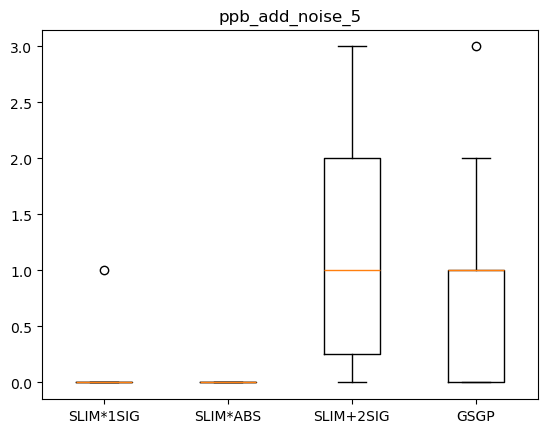

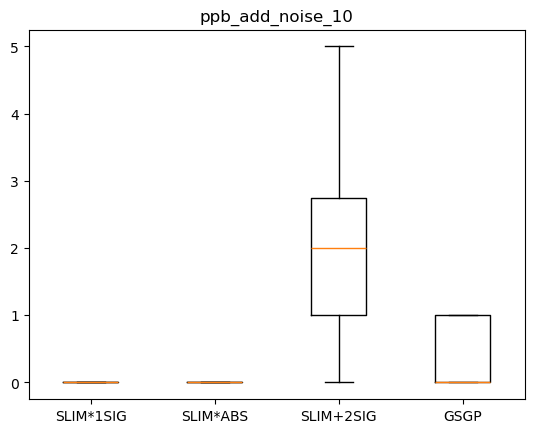

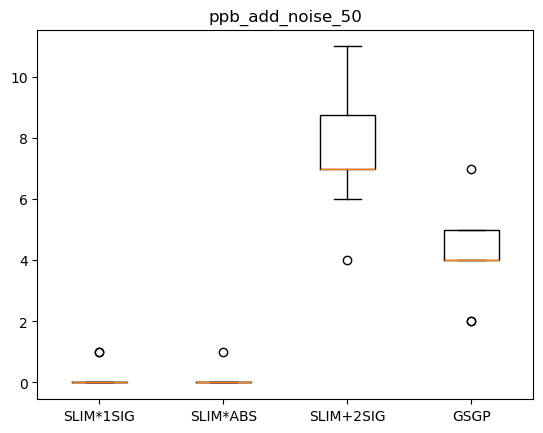

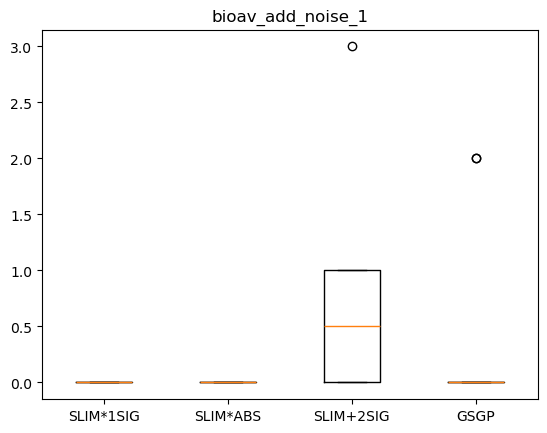

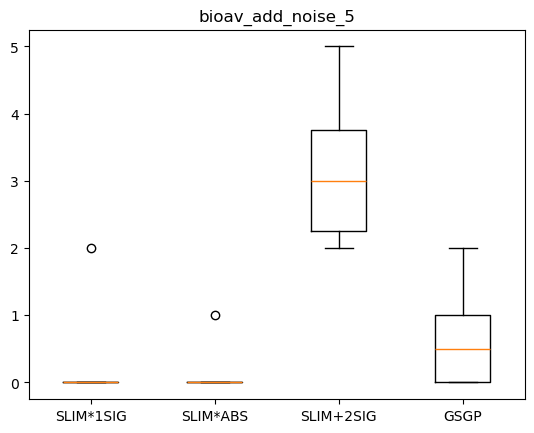

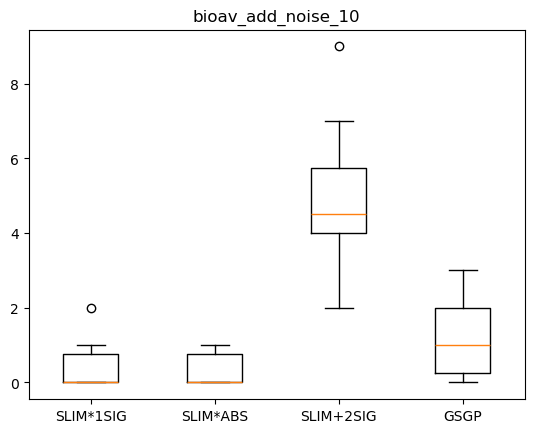

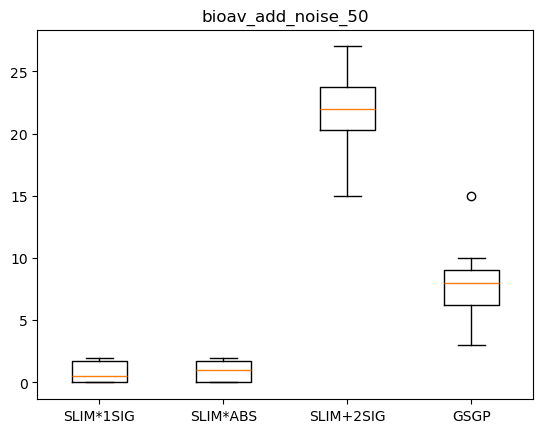

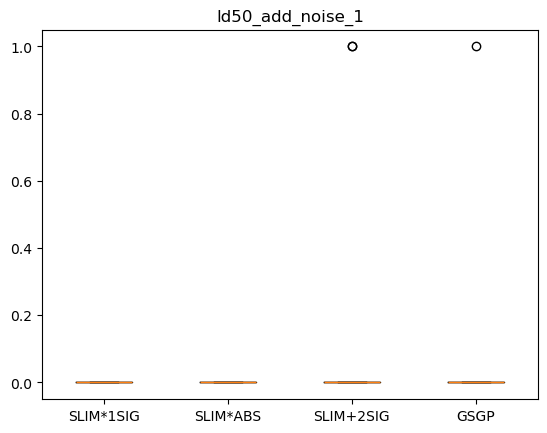

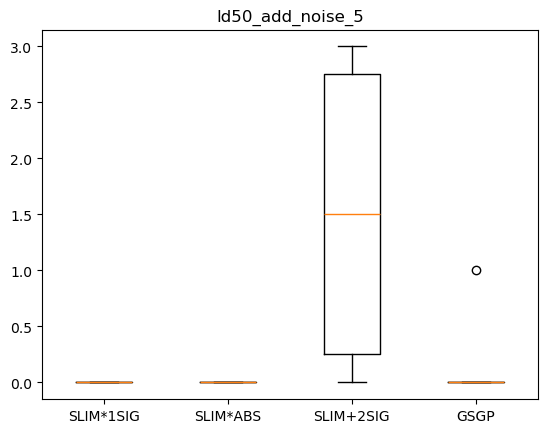

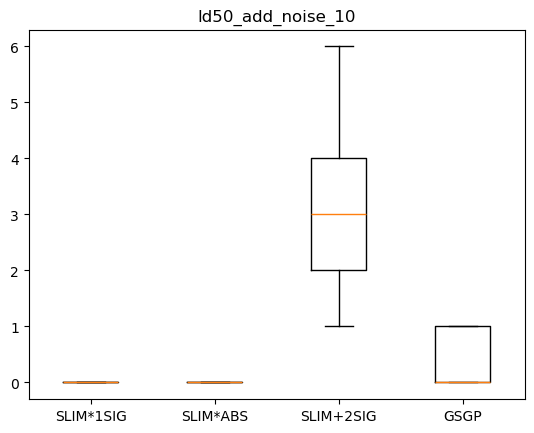

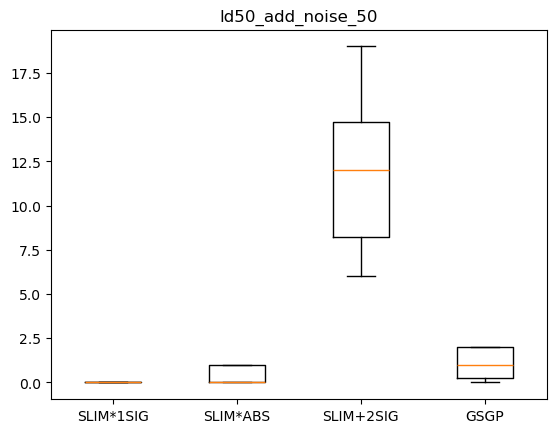

In [17]:
for experiment in counts.experiment.unique():
    for datas in counts.dataset.unique(): 
        for noise in counts.noise.unique():

            plt.boxplot([counts.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")["count_v"].values.tolist() 
                        for algo in counts.algo.unique()], labels  = counts.algo.unique())


            plt.title(f'{datas}_{experiment}_{noise}')
            # plt.legend()
            plt.show()

In [68]:
grouped = counts[["experiment", "dataset",   "noise", "algo", "count_v"]].groupby(["experiment", "dataset",   "noise", "algo"]).median()

In [69]:
grouped

count_v
experiment                  dataset           noise algo              
add_noise                   airfoil           1     GSGP          14.0
                                                    SLIM*1SIG      1.5
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      7.0
                                              5     GSGP          13.5
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       2.5
                                                    SLIM+2SIG     18.5
                                              10    GSGP          15.0
                                                    SLIM*1SIG      3.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     17.5
                                              50    GSGP          11.5
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     23.0
                            bioav             1     GSGP           0.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      0.5
                                              5     GSGP           0.5
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      3.0
                                              10    GSGP           1.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      4.5
                                              50    GSGP           8.0
                                                    SLIM*1SIG      0.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     22.0
                            concrete_slump    1     GSGP          38.0
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     12.0
                                              5     GSGP          67.0
                                                    SLIM*1SIG      8.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     52.0
                                              10    GSGP          70.5
                                                    SLIM*1SIG     11.0
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG     69.5
                                              50    GSGP          68.0
                                                    SLIM*1SIG      8.5
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG    100.0
                            concrete_strength 1     GSGP          15.0
                                                    SLIM*1SIG      2.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     23.0
                                              5     GSGP          33.0
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       4.5
                